# Thành viên
| ID       | Họ tên              |
|----------|---------------------|
| 19127399 | Huỳnh Cao Nhật Hiếu |
| 19127444 | Ngô Đăng Khoa       |                                 
| 19127134 | Nguyễn Gia Hân      |
| 19127637 | Nguyễn Khắc Vỹ      |

# Nhiệm vụ

***Ngô Đăng Khoa***

1. Phân tích các thể loại(genre) nhạc trong data track.
2. Phân bố người dùng, thể loại nhạc sở trường của ở mỗi quốc gia.
3.Mối liên hệ giữa likecount, repost count và track count xem coi số lượng track count trong playlist có ảnh hưởng người nghe không?

***Nguyễn Gia Hân***

4. Số lượng người dùng mới như thế nào sau mỗi năm.
5. Biểu diễn đồ thị về thời gian tạo của tracks và playlist thu thập được để rút ra kết luận liệu càng nhiều user mới thì có càng nhiều track, playlist được tạo không?
6. Vào năm nay (2021), các thể loại nào được phổ biến. Có thay đổi so với các năm trước không?

***Huỳnh Cao Nhật Hiếu***

7. Sự phân bố các bài hát (track) qua các năm để coi sự phân bố số lượng bài hát qua các năm như thế nào và có điều gì bất hợp lí không?
8. Các bài hát không có lượt like(likes_count) và không có lượt nghe lại(playback_count) có những đặc điểm gì? 
9. Mối liên hệ giữa số lượng comment(comment_count) và số lượt nghe cũng như số lượng lượt thích để xem nếu số lượng comment nhiều thì có đồng nghĩa với số lượng lượt nghe nhiều và số lượng lượt thích nhiều hay không?

***Nguyễn Khắc Vỹ***

10. Top 10 tracks, playlists theo từng năm.
11. Tiến hành thống kê qua từng năm.
12. Phân tích follower count và track count của user. Đưa ra kết luận mối quan hệ giữa chúng là tỉ lệ thuận hay tỉ lệ nghịch?

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# *THƯ VIỆN*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import matplotlib
from datetime import datetime
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# *TIỀN XỬ LÝ*

## Đọc và quan sát dữ liệu gốc

In [2]:
playlist =  pd.read_csv('Raw data/playlist.csv', sep='\t')
user = pd.read_csv('Raw data/user.csv', sep='\t')
track = pd.read_csv('Raw data/track.csv', sep='\t')

In [3]:
playlist.head()

,artwork_url,created_at,description,duration,embeddable_by,genre,id,kind,label_name,last_modified,...,tag_list,title,uri,user_id,set_type,is_album,published_at,display_date,track_count,trackIds
0,https://i1.sndcdn.com/artworks-000246771618-hc...,2016-11-15T06:54:05Z,NaN,8180513,all,Chill,275675917,playlist,NaN,2018-09-21T17:29:09Z,...,NaN,Chill,https://api.soundcloud.com/playlists/275675917,24439798,NaN,False,2016-11-15T06:54:05Z,2016-11-15T06:54:05Z,37,"208174877,101988938,245946661,1688272,6109158,..."
1,NaN,2017-04-03T14:00:59Z,NaN,4648624,all,Relax,312603422,playlist,NaN,2019-01-22T13:14:39Z,...,afterparty relax,After Party,https://api.soundcloud.com/playlists/312603422,208456866,NaN,False,2017-04-03T14:00:59Z,2017-04-03T14:00:59Z,17,"131058741,182859485,102700900,230219957,194510..."
2,https://i1.sndcdn.com/artworks-000169949629-ye...,2016-07-03T11:15:41Z,NaN,6741102,all,NaN,238293557,playlist,NaN,2019-09-29T09:58:29Z,...,gym workout,GYM,https://api.soundcloud.com/playlists/238293557,42878728,NaN,False,2016-07-03T11:15:41Z,2016-07-03T11:15:41Z,11,"273629819,270482836,145839137,110741387,234999..."
3,https://i1.sndcdn.com/artworks-000170566278-o5...,2016-07-07T23:22:55Z,Looking for a little workout motivation? Check...,4123564,all,WorkOut,239481577,playlist,NaN,2016-07-07T23:41:56Z,...,gym fitness motivation running Edm Dance House,Motivated Music - July 2016,https://api.soundcloud.com/playlists/239481577,163911442,NaN,False,2016-07-07T23:41:56Z,2016-07-07T23:41:56Z,18,"271409580,238162839,269226033,270690977,272594..."
4,https://i1.sndcdn.com/artworks-000551931102-ak...,2018-08-12T17:16:02Z,NaN,4026418,all,Jazz,581141859,playlist,NaN,2019-06-15T01:51:56Z,...,Relax Jazz lofi jazzhiphop,Jazz hip3,https://api.soundcloud.com/playlists/581141859,283347384,NaN,False,2018-08-12T17:22:33Z,2018-08-12T17:22:33Z,26,"339215568,243297554,327992677,305391956,413530..."


Cell ở trên là dữ liệu gốc của playlist. Quan sát ta thấy được có những cột như label_name, purchase_title, purchase_url, release_date và secret_token bị thiếu dữ liệu rất nhiều

In [4]:
track.head()

,artwork_url,caption,commentable,comment_count,created_at,description,downloadable,download_count,duration,full_duration,...,uri,urn,user_id,waveform_url,display_date,station_urn,station_permalink,track_authorization,monetization_model,policy
0,https://i1.sndcdn.com/artworks-dOEBzkP5GwAzgiD...,NaN,True,6.0,2021-10-28T10:53:21Z,"EGTS2021 Tiebreaker song. Players, good luck.\...",False,0.0,372036,372036,...,https://api.soundcloud.com/tracks/1149426313,soundcloud:tracks:1149426313,2832562,https://wave.sndcdn.com/snWpTibfJhd5_m.json,2021-11-07T17:19:32Z,soundcloud:system-playlists:track-stations:114...,track-stations:1149426313,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
1,https://i1.sndcdn.com/artworks-IcaRrZ0UypdOJSw...,NaN,True,55.0,2021-11-01T02:22:33Z,Download the song: https://geoffplaysguitar.ba...,False,0.0,263210,263210,...,https://api.soundcloud.com/tracks/1151626678,soundcloud:tracks:1151626678,79546796,https://wave.sndcdn.com/9kiIVuD3eM8S_m.json,2021-11-01T02:22:33Z,soundcloud:system-playlists:track-stations:115...,track-stations:1151626678,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
2,https://i1.sndcdn.com/artworks-6oBkPyxdIHz32QN...,NaN,True,0.0,2021-11-07T21:19:24Z,NaN,False,0.0,139703,139703,...,https://api.soundcloud.com/tracks/1155594988,soundcloud:tracks:1155594988,246016879,https://wave.sndcdn.com/tTyVdLcuRCQJ_m.json,2021-11-07T21:19:24Z,soundcloud:system-playlists:track-stations:115...,track-stations:1155594988,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
3,https://i1.sndcdn.com/artworks-9O8S7i2yrL2V3mj...,NaN,True,13.0,2021-11-10T13:00:51Z,if i finish this ill make the intro way more i...,False,0.0,23118,23118,...,https://api.soundcloud.com/tracks/1157467549,soundcloud:tracks:1157467549,584320599,https://wave.sndcdn.com/WpGkt2cFWkUM_m.json,2021-11-10T13:00:51Z,soundcloud:system-playlists:track-stations:115...,track-stations:1157467549,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
4,https://i1.sndcdn.com/artworks-CC6w7DCWgw7AL2X...,NaN,True,0.0,2021-11-08T02:59:15Z,The powerful brutal djent metal with aggressiv...,True,1.0,177267,177267,...,https://api.soundcloud.com/tracks/1155715915,soundcloud:tracks:1155715915,60835736,https://wave.sndcdn.com/7ROMnK0TQ5PJ_m.json,2021-11-08T02:59:15Z,soundcloud:system-playlists:track-stations:115...,track-stations:1155715915,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW


Cell ở trên là dữ liệu gốc của track. Quan sát ta thấy được có những cột như label_name, caption, purchase_title, purchase_url, release_date và secret_token bị thiếu dữ liệu rất nhiều

In [5]:
user.head()

,avatar_url,city,comments_count,country_code,created_at,description,followers_count,followings_count,first_name,full_name,...,uri,urn,username,verified,station_urn,station_permalink,visuals.urn,visuals.enabled,visuals.visuals,visuals.tracking
0,https://i1.sndcdn.com/avatars-2VdOHXNpTLn7Pww2...,chicago,18,US,2012-11-17T16:26:17Z,"Raised on the South Side of Chicago, Vic rose ...",331604,9,Vic,Vic Mensa,...,https://api.soundcloud.com/users/28508171,soundcloud:users:28508171,Vic Mensa.,True,soundcloud:system-playlists:artist-stations:28...,artist-stations:28508171,soundcloud:users:28508171,True,"[{'urn': 'soundcloud:visuals:146210187', 'entr...",NaN
1,https://i1.sndcdn.com/avatars-1FH0LLD3P5Dkiabh...,Toronto,190,CA,2015-06-14T17:41:19Z,Dream State EP out now on all streaming Platfo...,718,42,Eric,Eric Ryan,...,https://api.soundcloud.com/users/158105618,soundcloud:users:158105618,Eric Ryan ☀️,True,soundcloud:system-playlists:artist-stations:15...,artist-stations:158105618,soundcloud:users:158105618,True,"[{'urn': 'soundcloud:visuals:103502376', 'entr...",NaN
2,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,NaN,2019-12-02T11:16:41Z,NaN,110,0,NaN,NaN,...,https://api.soundcloud.com/users/742883347,soundcloud:users:742883347,Maty Deejay,False,NaN,soundcloud:system-playlists:artist-stations:74...,artist-stations:742883347,NaN,NaN,NaN
3,https://i1.sndcdn.com/avatars-yLSykC9ixLmgDfwN...,NaN,8,NL,2017-03-27T18:10:59Z,Calundé is the project of The Netherlands base...,439,30,NaN,NaN,...,https://api.soundcloud.com/users/297992211,soundcloud:users:297992211,CALUNDÉ,False,soundcloud:system-playlists:artist-stations:29...,artist-stations:297992211,soundcloud:users:297992211,True,"[{'urn': 'soundcloud:visuals:145586145', 'entr...",NaN
4,https://a1.sndcdn.com/images/default_avatar_la...,Seoul,0,KR,2012-02-13T12:41:29Z,NaN,33,0,Young,Young Sim,...,https://api.soundcloud.com/users/12025877,soundcloud:users:12025877,Dasomii,False,NaN,soundcloud:system-playlists:artist-stations:12...,artist-stations:12025877,NaN,NaN,NaN


Cell ở trên là dữ liệu gốc của user. Quan sát ta thấy được có những cột như label_name, repost_count, visuals tracking bị thiếu dữ liệu rất nhiều.

## Loại bỏ những cột không cần thiết chuyển đổi kiểu dữ liệu

Đối với mỗi tập dữ liệu đầu tiên cần phải lọc bỏ bớt những dòng dữ liệu bị trùng lắp bằng cách phân biệt theo thuộc tính id của mỗi loại data. Tiếp theo ta sẽ chuyển những dữ liệu thời gian từ format của Soundcloud thành format của thư viện datetime trong python đễ quan sát hơn. Cuối cùng ta sẽ chuyển đổi các kiểu dữ liệu thống kê như likes_count, repost_count, duration,... thành dạng số nguyên để có thể dễ dàng tính toán và phân tích. Lưu những dataframe mới vào trong folder Modified, đặt tên theo giống như trong tập data gốc của mỗi loại

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

In [7]:
playlist = playlist.drop_duplicates(subset='id')
keep_col = ['id', 'title', 'genre', 'duration', 'created_at', 'likes_count', 'reposts_count', 'kind','permalink', 'permalink_url', 'uri','user_id', 'tag_list', 'track_count', 'trackIds']
playlist = playlist[keep_col]
playlist['created_at'] = playlist['created_at'].apply(lambda a: datetime.strptime(a, '%Y-%m-%dT%H:%M:%SZ').date())
playlist.head()

for item in ['likes_count', 'reposts_count', 'track_count']:
    playlist[item] = playlist[item].apply(lambda x: int(x))

playlist.to_csv('Modified Data/playlist.csv', index=False, sep='\t')
playlist

,id,title,genre,duration,created_at,likes_count,reposts_count,kind,permalink,permalink_url,uri,user_id,tag_list,track_count,trackIds
0,275675917,Chill,Chill,8180513,2016-11-15,8997,688,playlist,chill,https://soundcloud.com/iijeriichoii/sets/chill,https://api.soundcloud.com/playlists/275675917,24439798,NaN,37,"208174877,101988938,245946661,1688272,6109158,..."
1,312603422,After Party,Relax,4648624,2017-04-03,4007,185,playlist,after-party,https://soundcloud.com/alcides-augusto-9485274...,https://api.soundcloud.com/playlists/312603422,208456866,afterparty relax,17,"131058741,182859485,102700900,230219957,194510..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,807418209,Liliy,NaN,18878183,2019-06-19,2337,138,playlist,liliy,https://soundcloud.com/user-445069339/sets/liliy,https://api.soundcloud.com/playlists/807418209,653423487,NaN,46,"582998373,593708394,631331493,613595466,619143..."
385,1080919600,HotSummerNights,NaN,4967925,2020-06-27,2037,71,playlist,kindababyblue,https://soundcloud.com/hanriverlove/sets/kinda...,https://api.soundcloud.com/playlists/1080919600,552289491,R&B Party,22,"774225379,526677828,457837785,328561715,537847..."


In [8]:
user = user.drop_duplicates(subset='id')
keep_col = ['id', 'username', 'city', 'country_code', 'created_at', 'followers_count', 'followings_count', 'first_name', 'last_name', 'full_name', 'kind', 'likes_count', 'comments_count', 'track_count', 
            'playlist_count','permalink', 'permalink_url', 'uri', 'verified']
user = user[keep_col]
user['created_at'] = user['created_at'].apply(lambda a: datetime.strptime(a, '%Y-%m-%dT%H:%M:%SZ').date())
user
for item in ['likes_count', 'followers_count', 'followings_count', 'track_count', 'comments_count', 'playlist_count']:
    user[item] = user[item].apply(lambda x: int(x))
user.to_csv('Modified Data/user.csv', index=False, sep='\t')
user

,id,username,city,country_code,created_at,followers_count,followings_count,first_name,last_name,full_name,kind,likes_count,comments_count,track_count,playlist_count,permalink,permalink_url,uri,verified
0,28508171,Vic Mensa.,chicago,US,2012-11-17,331604,9,Vic,Mensa,Vic Mensa,user,16,18,129,15,vicsavemoney,https://soundcloud.com/vicsavemoney,https://api.soundcloud.com/users/28508171,True
1,158105618,Eric Ryan ☀️,Toronto,CA,2015-06-14,718,42,Eric,Ryan,Eric Ryan,user,40,190,12,2,ericryanpascual,https://soundcloud.com/ericryanpascual,https://api.soundcloud.com/users/158105618,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13656,66682829,tous,Ha Noi,VN,2013-11-16,758,261,Cẩm,Tú,Cẩm Tú,user,1227,42,10,1,hydrangea99,https://soundcloud.com/hydrangea99,https://api.soundcloud.com/users/66682829,False
13658,1146848,Billx,UCSTR Records,FR,2010-06-08,80313,6,Rave Music,NaN,Rave Music,user,10,0,91,4,billx,https://soundcloud.com/billx,https://api.soundcloud.com/users/1146848,True


In [9]:
track =track.drop_duplicates(subset='id')
keep_col = ['id', 'title', 'user_id', 'genre', 'created_at', 'duration', 'comment_count', 'download_count', 'kind', 'likes_count', 
            'playback_count', 'reposts_count', 'permalink_url', 'tag_list', 'track_format', 'uri']
track = track[keep_col]
track['created_at'] = track['created_at'].apply(lambda a: datetime.strptime(a, '%Y-%m-%dT%H:%M:%SZ').date())
for item in ['comment_count', 'download_count', 'likes_count', 'playback_count', 'reposts_count']:
    track[item] = track[item].apply(lambda x: int(x) if str(x) != 'nan' else 0)
track.to_csv('Modified Data/track.csv', index=False, sep='\t')
track

,id,title,user_id,genre,created_at,duration,comment_count,download_count,kind,likes_count,playback_count,reposts_count,permalink_url,tag_list,track_format,uri
0,1149426313,Conclusio Catastropha,2832562,Electronic,2021-10-28,372036,6,0,track,161,1936,12,https://soundcloud.com/iceloki/ice-conclusio-c...,EGTS2021,single-track,https://api.soundcloud.com/tracks/1149426313
1,1151626678,Megalovania (in the style of Doom Eternal) fro...,79546796,Metal,2021-11-01,263210,55,0,track,653,9528,68,https://soundcloud.com/geoffplaysguitar/megalo...,"undertale deltarune ""mick gordon"" doom ""doom e...",single-track,https://api.soundcloud.com/tracks/1151626678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,1175592553,hobby (prod Chris Birdd),4783546,NaN,2021-12-10,142054,0,0,track,9,693,1,https://soundcloud.com/chrisbirdd/hobby,"rnb ""Hip Hop"" Pop newmusicfriday upandcomingar...",single-track,https://api.soundcloud.com/tracks/1175592553
22548,1163003491,No Better Than This (prod Chris Birdd ),4783546,Chris Birdd,2021-11-19,178834,3,0,track,56,4526,0,https://soundcloud.com/chrisbirdd/no-better-th...,"""chris birdd"" newmusic rnb singer feelgoodmusi...",single-track,https://api.soundcloud.com/tracks/1163003491


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# *XỬ LÝ DỮ LIỆU*

## Một số hàm cài đặt thêm

### Hàm show Value trên các plot

In [10]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

### Hàm thống kê số liệu users cho mỗi quốc gia
với mỗi country code trong dữ liệu users sẽ return ra một dataframe thống kê số lượng người dùng ở mỗi quốc gia

In [11]:
def country_stat(country_code, df):
    temp_df = df[df['country_code'] == country_code]
    return pd.DataFrame([{
        'Code': country_code,
        'Country': CC[country_code],
        'Number of user': len(temp_df)
    }])

### Hàm thống kê số liệu cho mỗi genre
với mỗi genre có trong data track, hàm sẽ return các số liệu về số lượng bài hát, lượt nghe, lượt thích và reposts

In [12]:
def genre_stat(genre, df):
    temp_df = df[df['genre'] == genre]
    return pd.DataFrame([{
        'Genre': genre,
        'Number of song': len(temp_df),
        'Playback count': temp_df['playback_count'].sum(),
        'likes count': temp_df['likes_count'].sum(),
        'reposts count': temp_df['reposts_count'].sum()
    }])
    

## Phân tích dữ liệu và các câu hỏi đặt ra cho bộ dữ liệu

### 1. Phân tích các thể loại(genre) nhạc trong data track

Đọc các file dữ liệu trong folder **Modified data**, do các genre trong track do người dùng đặt không có thống nhất về viết hoa hay thường nên phải đưa về dạng lowercase hết để có thể dễ dàng phân tích

In [13]:
playlist = pd.read_csv('Modified Data/playlist.csv', sep='\t')
track = pd.read_csv('Modified Data/track.csv', sep='\t')
user = pd.read_csv('Modified Data/user.csv', sep='\t')
track['genre'] = track['genre'].str.lower()

### Lập một dataframe mới để thống kê số liệu các genre trong track, dataframe này được sắp xếp theo số lượng các bài hát đã thống kê được của mỗi genre trong track list

In [14]:
genres_type = set(track['genre'])
genre_df = pd.DataFrame(columns=['Genre', 'Number of song', 'Playback count', 'likes count', 'reposts count'])
for item in genres_type:
    genre_df = genre_df.append(genre_stat(item, track))

genre_df = genre_df.sort_values(by='Number of song', ascending=False)
genre_df.head()

,Genre,Number of song,Playback count,likes count,reposts count
0,electronic,544,1424849781,23497452,3051847
0,dance & edm,441,1014711011,16625224,1406872
0,deep house,290,790094717,12759128,1540307
0,pop,270,590521078,7544803,534910
0,hip-hop & rap,269,888258063,12027186,654642


#### Phân bố của số lượng các bài hát của mỗi Genre:

Text(0.5, 1.0, 'Song distributions')

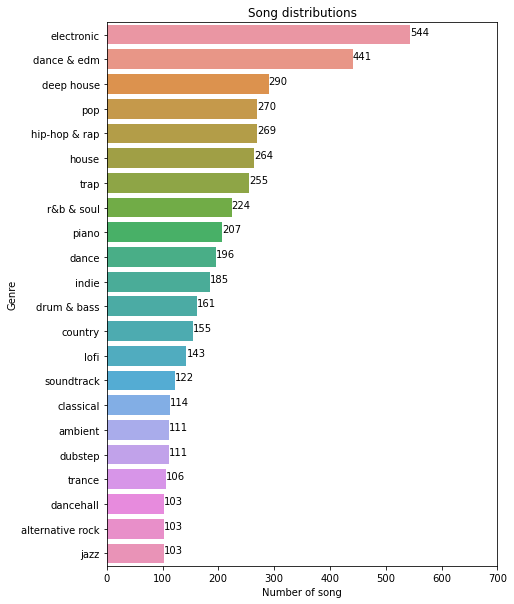

In [15]:
f, ax = plt.subplots(figsize=(7, 10))
p = sns.barplot(y = 'Genre', x ='Number of song', data=genre_df[genre_df['Number of song'] > 100],orient="h" ) 
show_values(p, "h", space= 0.09)
plt.xlim(0,700)
plt.title('Song distributions')

Biểu đồ trên cho ta biết được những genre nào phổ biến nhất trong tập dữ liệu đã thu thập được thông qua số lượng các bài hát. Nhiều nhất là thể loại nhạc electronic với 544 bài hát

Tiếp theo chúng ta sẽ đến với các genre được yêu thích nhất được sắp xếp theo các đặc trưng của playback_count(số lượng lượt nghe) và likes_count(số lượng lượt thích) của mỗi genre.

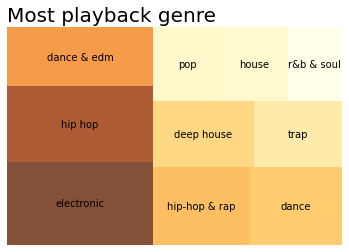

,Genre,Number of song,Playback count,likes count,reposts count
0,electronic,544,1424849781,23497452,3051847
0,hip hop,96,1304368167,16127610,1057104
...,...,...,...,...,...
0,ez rock future star,1,0,0,0
0,NaN,0,0,0,0


In [16]:
temp = genre_df.sort_values(by=['Playback count','likes count'], ascending=False)
my_values = temp['Playback count'].iloc[:10]
mini=min(my_values)
maxi=max(my_values)
cmap = matplotlib.cm.YlOrBr
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
squarify.plot(sizes=my_values, label=temp['Genre'].iloc[:10], alpha=.8, color=colors)
plt.title('Most playback genre', fontsize=20, fontweight=0, color='black', loc='left')
plt.axis('off')
plt.show()
temp

Qua treemap và bảng số liệu ở trên, ta có thể biết được electronic là thể loại nhạc có nhiều lượt nghe nhất và có một sự đặc biệt là thể loại hip hop tuy có số lượng nhạc thu thập được khá khiêm tốn nhưng lại đứng thứ hai trong bảng danh sách này.

##### Tiếp theo chúng ta sẽ phân tích số liệu từ các box plot của những thể loại nhạc tiêu biểu ở trên

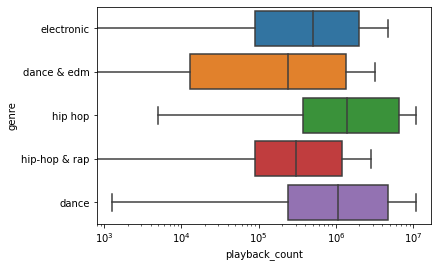

In [17]:
temp = genre_df.sort_values(by=['Playback count','likes count'], ascending=False)
distribute = track[track['genre'].isin(temp['Genre'].iloc[:5])]
g = sns.boxplot(y='genre', x='playback_count', data=distribute, showfliers=False)
plt.ticklabel_format(style='plain', axis='x')
plt.xscale('log')
plt.show()

Đây là boxplot thể hiện phân bố dữ liệu lượt nghe của mỗi genre trên. Mặc dù thể loại electronic có lượt nghe nhiều nhất nhưng xu hướng tập trung của dữ liệu (trung vị) lại không bằng thể loại hip hop và dance. Thêm nữa là giá trị lượt nghe nhỏ nhất của thể loại hip hop là vượt trội hơn những thể loại còn lại, chứng tỏ rằng thể loại nhạc này là hot nhất trên soundcloud

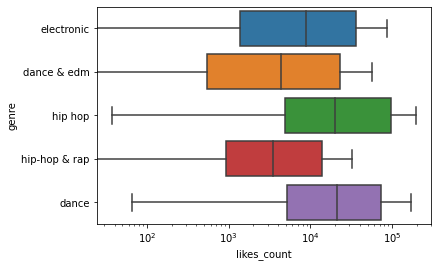

In [18]:
temp = genre_df.sort_values(by=['Playback count','likes count'], ascending=False)
distribute = track[track['genre'].isin(temp['Genre'].iloc[:5])]
g = sns.boxplot(y='genre', x='likes_count', data=distribute, showfliers=False)
plt.ticklabel_format(style='plain', axis='x')
plt.xscale('log')
plt.show()

Boxplot thể hiện lượt thích của các genre. Ở đây ta thấy được một điều nữa là sự tập trung dữ liệu của thể loại dance và hip hop khá là giống nhau

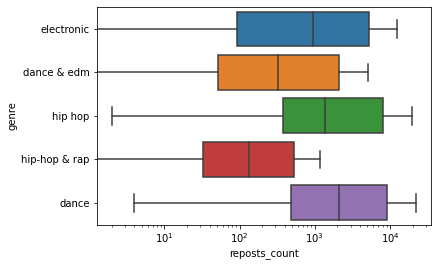

In [19]:
temp = genre_df.sort_values(by=['Playback count','likes count'], ascending=False)
distribute = track[track['genre'].isin(temp['Genre'].iloc[:5])]
g = sns.boxplot(y='genre', x='reposts_count', data=distribute, showfliers=False)
plt.ticklabel_format(style='plain', axis='x')
plt.xscale('log')
plt.show()

Và ở cả boxplot về phân bố lượt repost cũng có hình dạng tương đồng đối với 2 boxplot ở trên

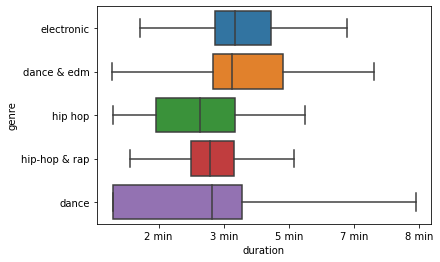

In [20]:
temp = genre_df.sort_values(by=['Playback count','likes count'], ascending=False)
distribute = track[track['genre'].isin(temp['Genre'].iloc[:5])]
g = sns.boxplot(y='genre', x='duration', data=distribute, showfliers=False)
plt.ticklabel_format(style='plain', axis='x')
xlabels = ['{:,.0f}'.format(x) + ' min' for x in g.get_xticks()/60000]
g.set_xticklabels(xlabels)
plt.show()

Boxplot thể hiện thời gian của mỗi thể loại nhạc, phần lớn các thể loại trên đều có độ dài tập trung 3 phút. Trong đó đa số các bài hát của thể loại nhạc dance có độ dài dưới 3 phút, còn nhạc electronic và edm lại lớn hơn 3 phút

### 2. Phân bố người dùng, thể loại nhạc sở trường của ở mỗi quốc gia

### Dictionary CC chứa tên các quốc gia theo iso code

In [21]:
CC = {
    "AF": "AFGHANISTAN",
    "AX": "ÅLAND ISLANDS",
    "AL": "ALBANIA",
    "DZ": "ALGERIA",
    "AS": "AMERICAN SAMOA",
    "AD": "ANDORRA",
    "AO": "ANGOLA",
    "AI": "ANGUILLA",
    "AQ": "ANTARCTICA",
    "AG": "ANTIGUA AND BARBUDA",
    "AR": "ARGENTINA",
    "AM": "ARMENIA",
    "AW": "ARUBA",
    "AU": "AUSTRALIA",
    "AT": "AUSTRIA",
    "AZ": "AZERBAIJAN",
    "BS": "BAHAMAS",
    "BH": "BAHRAIN",
    "BD": "BANGLADESH",
    "BB": "BARBADOS",
    "BY": "BELARUS",
    "BE": "BELGIUM",
    "BZ": "BELIZE",
    "BJ": "BENIN",
    "BM": "BERMUDA",
    "BT": "BHUTAN",
    "BO": "BOLIVIA, PLURINATIONAL STATE OF",
    "BQ": "BONAIRE, SINT EUSTATIUS AND SABA",
    "BA": "BOSNIA AND HERZEGOVINA",
    "BW": "BOTSWANA",
    "BV": "BOUVET ISLAND",
    "BR": "BRAZIL",
    "IO": "BRITISH INDIAN OCEAN TERRITORY",
    "BN": "BRUNEI DARUSSALAM",
    "BG": "BULGARIA",
    "BF": "BURKINA FASO",
    "BI": "BURUNDI",
    "KH": "CAMBODIA",
    "CM": "CAMEROON",
    "CA": "CANADA",
    "CV": "CAPE VERDE",
    "KY": "CAYMAN ISLANDS",
    "CF": "CENTRAL AFRICAN REPUBLIC",
    "TD": "CHAD",
    "CL": "CHILE",
    "CN": "CHINA",
    "CX": "CHRISTMAS ISLAND",
    "CC": "COCOS (KEELING) ISLANDS",
    "CO": "COLOMBIA",
    "KM": "COMOROS",
    "CG": "CONGO",
    "CD": "CONGO, THE DEMOCRATIC REPUBLIC OF THE",
    "CK": "COOK ISLANDS",
    "CR": "COSTA RICA",
    "CI": "CÔTE D'IVOIRE",
    "HR": "CROATIA",
    "CU": "CUBA",
    "CW": "CURAÇAO",
    "CY": "CYPRUS",
    "CZ": "CZECH REPUBLIC",
    "DK": "DENMARK",
    "DJ": "DJIBOUTI",
    "DM": "DOMINICA",
    "DO": "DOMINICAN REPUBLIC",
    "EC": "ECUADOR",
    "EG": "EGYPT",
    "SV": "EL SALVADOR",
    "GQ": "EQUATORIAL GUINEA",
    "ER": "ERITREA",
    "EE": "ESTONIA",
    "ET": "ETHIOPIA",
    "FK": "FALKLAND ISLANDS (MALVINAS)",
    "FO": "FAROE ISLANDS",
    "FJ": "FIJI",
    "FI": "FINLAND",
    "FR": "FRANCE",
    "GF": "FRENCH GUIANA",
    "PF": "FRENCH POLYNESIA",
    "TF": "FRENCH SOUTHERN TERRITORIES",
    "GA": "GABON",
    "GM": "GAMBIA",
    "GE": "GEORGIA",
    "DE": "GERMANY",
    "GH": "GHANA",
    "GI": "GIBRALTAR",
    "GR": "GREECE",
    "GL": "GREENLAND",
    "GD": "GRENADA",
    "GP": "GUADELOUPE",
    "GU": "GUAM",
    "GT": "GUATEMALA",
    "GG": "GUERNSEY",
    "GN": "GUINEA",
    "GW": "GUINEA-BISSAU",
    "GY": "GUYANA",
    "HT": "HAITI",
    "HM": "HEARD ISLAND AND MCDONALD ISLANDS",
    "VA": "HOLY SEE (VATICAN CITY STATE)",
    "HN": "HONDURAS",
    "HK": "HONG KONG",
    "HU": "HUNGARY",
    "IS": "ICELAND",
    "IN": "INDIA",
    "ID": "INDONESIA",
    "IR": "IRAN, ISLAMIC REPUBLIC OF",
    "IQ": "IRAQ",
    "IE": "IRELAND",
    "IM": "ISLE OF MAN",
    "IL": "ISRAEL",
    "IT": "ITALY",
    "JM": "JAMAICA",
    "JP": "JAPAN",
    "JE": "JERSEY",
    "JO": "JORDAN",
    "KZ": "KAZAKHSTAN",
    "KE": "KENYA",
    "KI": "KIRIBATI",
    "KP": "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",
    "KR": "KOREA, REPUBLIC OF",
    "KW": "KUWAIT",
    "KG": "KYRGYZSTAN",
    "LA": "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
    "LV": "LATVIA",
    "LB": "LEBANON",
    "LS": "LESOTHO",
    "LR": "LIBERIA",
    "LY": "LIBYA",
    "LI": "LIECHTENSTEIN",
    "LT": "LITHUANIA",
    "LU": "LUXEMBOURG",
    "MO": "MACAO",
    "MK": "MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF",
    "MG": "MADAGASCAR",
    "MW": "MALAWI",
    "MY": "MALAYSIA",
    "MV": "MALDIVES",
    "ML": "MALI",
    "MT": "MALTA",
    "MH": "MARSHALL ISLANDS",
    "MQ": "MARTINIQUE",
    "MR": "MAURITANIA",
    "MU": "MAURITIUS",
    "YT": "MAYOTTE",
    "MX": "MEXICO",
    "FM": "MICRONESIA, FEDERATED STATES OF",
    "MD": "MOLDOVA, REPUBLIC OF",
    "MC": "MONACO",
    "MN": "MONGOLIA",
    "ME": "MONTENEGRO",
    "MS": "MONTSERRAT",
    "MA": "MOROCCO",
    "MZ": "MOZAMBIQUE",
    "MM": "MYANMAR",
    "NA": "NAMIBIA",
    "NR": "NAURU",
    "NP": "NEPAL",
    "NL": "NETHERLANDS",
    "NC": "NEW CALEDONIA",
    "NZ": "NEW ZEALAND",
    "NI": "NICARAGUA",
    "NE": "NIGER",
    "NG": "NIGERIA",
    "NU": "NIUE",
    "NF": "NORFOLK ISLAND",
    "MP": "NORTHERN MARIANA ISLANDS",
    "NO": "NORWAY",
    "OM": "OMAN",
    "PK": "PAKISTAN",
    "PW": "PALAU",
    "PS": "PALESTINE, STATE OF",
    "PA": "PANAMA",
    "PG": "PAPUA NEW GUINEA",
    "PY": "PARAGUAY",
    "PE": "PERU",
    "PH": "PHILIPPINES",
    "PN": "PITCAIRN",
    "PL": "POLAND",
    "PT": "PORTUGAL",
    "PR": "PUERTO RICO",
    "QA": "QATAR",
    "RE": "RÉUNION",
    "RO": "ROMANIA",
    "RU": "RUSSIAN FEDERATION",
    "RW": "RWANDA",
    "BL": "SAINT BARTHÉLEMY",
    "SH": "SAINT HELENA, ASCENSION AND TRISTAN DA CUNHA",
    "KN": "SAINT KITTS AND NEVIS",
    "LC": "SAINT LUCIA",
    "MF": "SAINT MARTIN (FRENCH PART)",
    "PM": "SAINT PIERRE AND MIQUELON",
    "VC": "SAINT VINCENT AND THE GRENADINES",
    "WS": "SAMOA",
    "SM": "SAN MARINO",
    "ST": "SAO TOME AND PRINCIPE",
    "SA": "SAUDI ARABIA",
    "SN": "SENEGAL",
    "RS": "SERBIA",
    "SC": "SEYCHELLES",
    "SL": "SIERRA LEONE",
    "SG": "SINGAPORE",
    "SX": "SINT MAARTEN (DUTCH PART)",
    "SK": "SLOVAKIA",
    "SI": "SLOVENIA",
    "SB": "SOLOMON ISLANDS",
    "SO": "SOMALIA",
    "ZA": "SOUTH AFRICA",
    "GS": "SOUTH GEORGIA AND THE SOUTH SANDWICH ISLANDS",
    "SS": "SOUTH SUDAN",
    "ES": "SPAIN",
    "LK": "SRI LANKA",
    "SD": "SUDAN",
    "SR": "SURINAME",
    "SJ": "SVALBARD AND JAN MAYEN",
    "SZ": "SWAZILAND",
    "SE": "SWEDEN",
    "CH": "SWITZERLAND",
    "SY": "SYRIAN ARAB REPUBLIC",
    "TW": "TAIWAN, PROVINCE OF CHINA",
    "TJ": "TAJIKISTAN",
    "TZ": "TANZANIA, UNITED REPUBLIC OF",
    "TH": "THAILAND",
    "TL": "TIMOR-LESTE",
    "TG": "TOGO",
    "TK": "TOKELAU",
    "TO": "TONGA",
    "TT": "TRINIDAD AND TOBAGO",
    "TN": "TUNISIA",
    "TR": "TURKEY",
    "TM": "TURKMENISTAN",
    "TC": "TURKS AND CAICOS ISLANDS",
    "TV": "TUVALU",
    "UG": "UGANDA",
    "UA": "UKRAINE",
    "AE": "UNITED ARAB EMIRATES",
    "GB": "UNITED KINGDOM",
    "US": "UNITED STATES",
    "UM": "UNITED STATES MINOR OUTLYING ISLANDS",
    "UY": "URUGUAY",
    "UZ": "UZBEKISTAN",
    "VU": "VANUATU",
    "VE": "VENEZUELA, BOLIVARIAN REPUBLIC OF",
    "VN": "VIET NAM",
    "VG": "VIRGIN ISLANDS, BRITISH",
    "VI": "VIRGIN ISLANDS, U.S.",
    "WF": "WALLIS AND FUTUNA",
    "EH": "WESTERN SAHARA",
    "YE": "YEMEN",
    "ZM": "ZAMBIA",
    "ZW": "ZIMBABWE",
}

In [22]:
user

,id,username,city,country_code,created_at,followers_count,followings_count,first_name,last_name,full_name,kind,likes_count,comments_count,track_count,playlist_count,permalink,permalink_url,uri,verified
0,28508171,Vic Mensa.,chicago,US,2012-11-17,331604,9,Vic,Mensa,Vic Mensa,user,16,18,129,15,vicsavemoney,https://soundcloud.com/vicsavemoney,https://api.soundcloud.com/users/28508171,True
1,158105618,Eric Ryan ☀️,Toronto,CA,2015-06-14,718,42,Eric,Ryan,Eric Ryan,user,40,190,12,2,ericryanpascual,https://soundcloud.com/ericryanpascual,https://api.soundcloud.com/users/158105618,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8081,66682829,tous,Ha Noi,VN,2013-11-16,758,261,Cẩm,Tú,Cẩm Tú,user,1227,42,10,1,hydrangea99,https://soundcloud.com/hydrangea99,https://api.soundcloud.com/users/66682829,False
8082,1146848,Billx,UCSTR Records,FR,2010-06-08,80313,6,Rave Music,NaN,Rave Music,user,10,0,91,4,billx,https://soundcloud.com/billx,https://api.soundcloud.com/users/1146848,True


### Tạo ra một dataframe thống kê số người dùng ở mỗi quốc gia

In [23]:
country_df = pd.DataFrame()
for item in set(user['country_code']):
    if str(item) == 'nan':
        continue
    country_df = country_df.append(country_stat(item, user))

country_df = country_df.sort_values(by='Number of user', ascending=False)
country_df

,Code,Country,Number of user
0,US,UNITED STATES,1443
0,VN,VIET NAM,466
...,...,...,...
0,SL,SIERRA LEONE,1
0,GY,GUYANA,1


### Biểu đồ phân bổ người dùng ở mỗi quốc gia

(0.0, 1700.0)

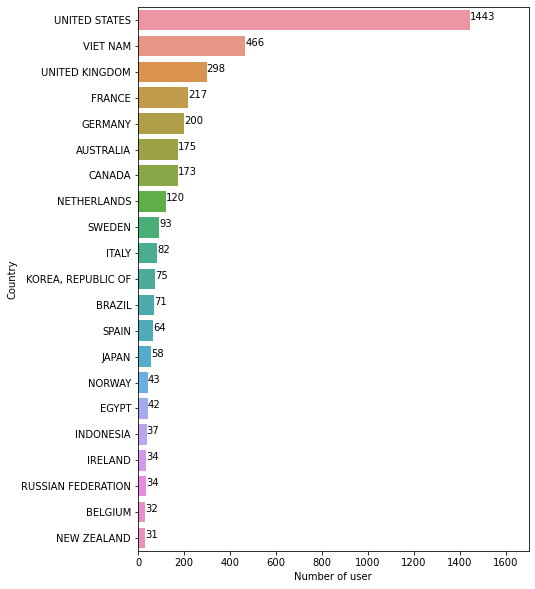

In [24]:
f, ax = plt.subplots(figsize=(7, 10))
p = sns.barplot(y = 'Country', x ='Number of user', data=country_df[country_df['Number of user'] > 30],orient="h" )
show_values(p, "h")
plt.xlim(0,1700)

Nước Mỹ là nước có nhiều người dùng nhất với 1443 users gấp hơn 3 lần đối với nước ở vị trí thứ hai(466 người).

### Kết hai bảng user và track lại để có một dataframe mới để biết được track này do user của nước nào tạo ra

In [25]:
track_join_user = track[['id', 'title', 'user_id', 'genre', 'likes_count', 'playback_count', 'reposts_count']].join\
                    (user[['id','username', 'country_code' ]].set_index('id'), on='user_id')

Hàm **country_genre** dùng để thống kê số lượng genre cho mỗi Dataframe cho mỗi quốc gia

In [26]:
def country_genre(df):
    genres_type = set(df['genre'])
    genre_df = pd.DataFrame(columns=['Genre', 'Number of song', 'Playback count', 'likes count', 'reposts count'])
    for item in genres_type:
        genre_df = genre_df.append(genre_stat(item, df))
    genre_df = genre_df = genre_df.sort_values(by='Number of song', ascending=False)
    
    return genre_df.iloc[:5]

### Các thể loại nhạc phổ biến của 5 quốc gia có số người dùng nhiều nhất

#### Vietnam


(0.0, 100.0, 0.0, 100.0)

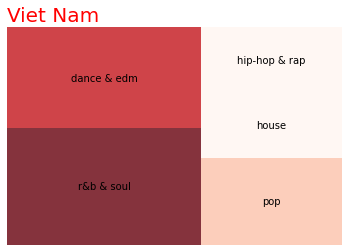

In [27]:
temp = country_genre(track_join_user[track_join_user['country_code']=='VN'])
my_values = temp['Number of song']
mini=min(my_values)
maxi=max(my_values)
cmap = matplotlib.cm.Reds
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
squarify.plot(sizes=my_values, label=temp['Genre'], alpha=.8, color=colors)
plt.title('Viet Nam', fontsize=20, fontweight=0, color='Red', loc='left')
plt.axis('off')

#### US

(0.0, 100.0, 0.0, 100.0)

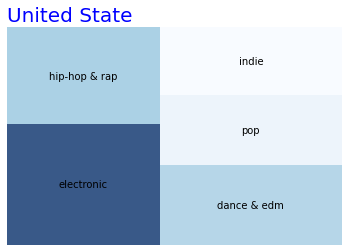

In [28]:
temp = country_genre(track_join_user[track_join_user['country_code']=='US'])
my_values = temp['Number of song']
mini=min(my_values)
maxi=max(my_values)
cmap = matplotlib.cm.Blues
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
squarify.plot(sizes=my_values, label=temp['Genre'], alpha=.8, color=colors)
plt.title('United State', fontsize=20, fontweight=0, color='Blue', loc='left')
plt.axis('off')

#### UK

(0.0, 100.0, 0.0, 100.0)

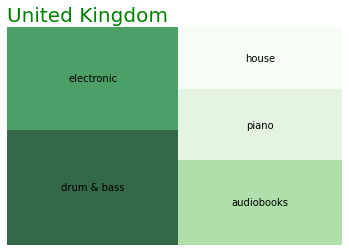

In [29]:
temp = country_genre(track_join_user[track_join_user['country_code']=='GB'])
my_values = temp['Number of song']
mini=min(my_values)
maxi=max(my_values)
cmap = matplotlib.cm.Greens
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
squarify.plot(sizes=my_values, label=temp['Genre'], alpha=.8, color=colors)
plt.title('United Kingdom', fontsize=20, fontweight=0, color='g', loc='left')
plt.axis('off')

#### DE

(0.0, 100.0, 0.0, 100.0)

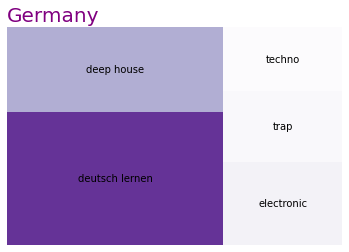

In [30]:
temp = country_genre(track_join_user[track_join_user['country_code']=='DE'])
my_values = temp['Number of song']
mini=min(my_values)
maxi=max(my_values)
cmap = matplotlib.cm.Purples
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
squarify.plot(sizes=my_values, label=temp['Genre'], alpha=.8, color=colors)
plt.title('Germany', fontsize=20, fontweight=0, color='purple', loc='left')
plt.axis('off')

#### FR

(0.0, 100.0, 0.0, 100.0)

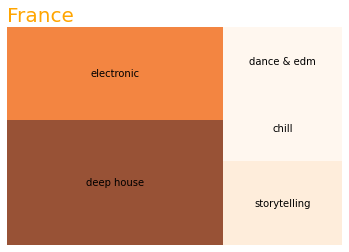

In [31]:
temp = country_genre(track_join_user[track_join_user['country_code']=='FR'])
my_values = temp['Number of song']
mini=min(my_values)
maxi=max(my_values)
cmap = matplotlib.cm.Oranges
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
squarify.plot(sizes=my_values, label=temp['Genre'], alpha=.8, color=colors)
plt.title('France', fontsize=20, fontweight=0, color='orange', loc='left')
plt.axis('off')

### 3.Mối liên hệ giữa likecount, repost count và track count xem coi số lượng track count trong playlist có ảnh hưởng người nghe không ?


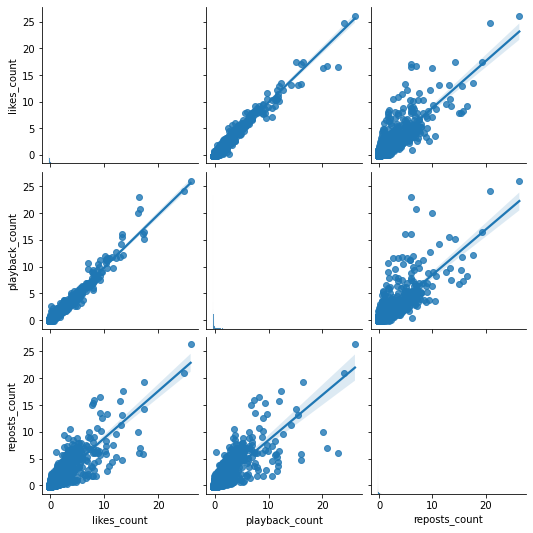

In [32]:
data = track[['likes_count', 'playback_count', 'reposts_count']]
data['likes_count'] = (data['likes_count'] - data['likes_count'].mean()) / data['likes_count'].std()            #Normalization
data['playback_count'] = (data['playback_count'] - data['playback_count'].mean()) / data['playback_count'].std()#Normalization
data['reposts_count'] = (data['reposts_count'] - data['reposts_count'].mean()) / data['reposts_count'].std()    #Normalization
sns.pairplot(data, kind="reg")
plt.show()

Correlogram giữa các thông số thống kê như likes_count, playback_count và reposts_count ở trong tập dữ liệu của track. Qua correlogram trên ta thấy được mối quan hệ tỉ lệ thuận khá rõ ràng của 3 thuộc tính nhất là mối quan hệ giữ playback_count và likes_count.

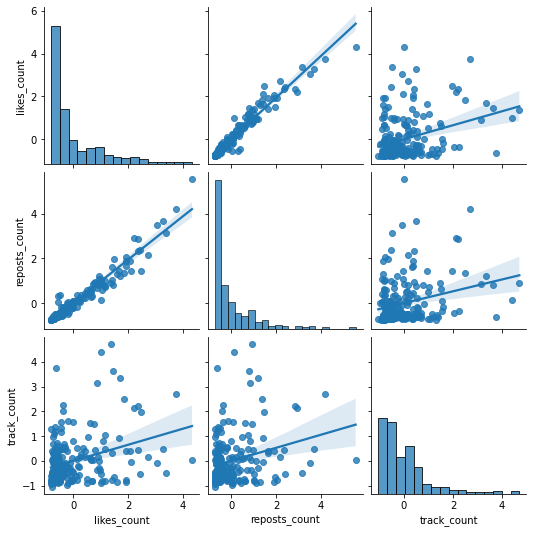

In [33]:
data = playlist[['likes_count', 'reposts_count', 'track_count']]
data['likes_count'] = (data['likes_count'] - data['likes_count'].mean()) / data['likes_count'].std()
data['track_count'] = (data['track_count'] - data['track_count'].mean()) / data['track_count'].std()
data['reposts_count'] = (data['reposts_count'] - data['reposts_count'].mean()) / data['reposts_count'].std()
sns.pairplot(data, kind="reg")
plt.show()

correlogram giữa likes_count, repost_count và track_count trong playlist để quan sát xem số lượng track_count trong một playlist có tác động đến lượt tương tác của playlist không? Và có vẻ như track_count như không có liên hệ gì đối với số liệu về sự tương tác của một playlist khi các điểm dữ liệu không phân bố theo một quy luật nào cả.

### 4. Số lượng người dùng mới như thế nào sau mỗi năm 

In [34]:
data_users = pd.read_csv('Modified Data/user.csv', sep='\t')

In [35]:
vals = data_users['created_at']
new_vals=[]
for val in vals:
    new_val = dt.datetime.strptime(val, '%Y-%m-%d')
    new_vals.append(new_val)
data_users['created_at'] = new_vals

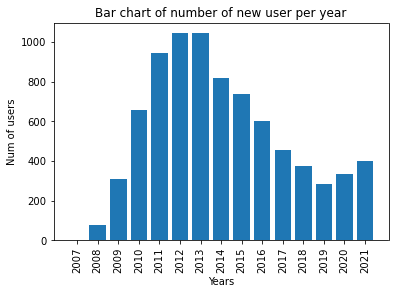

In [36]:
user_year= {}
for i in data_users['created_at']:
    user_year[i.year] = user_year.get(i.year, 0) + 1
diff_year = list(user_year.keys())
counts = list(user_year.values())
plt.bar(diff_year, counts)
plt.xticks(diff_year, rotation = 90)
plt.xlabel('Years')
plt.ylabel('Num of users')
plt.title('Bar chart of number of new user per year');

Phân tích về số lượng người dùng mới:
- Vào những năm 2007 đến 2009 có khá ít người dùng mới -> Lúc này có thể ứng dụng chưa phổ biến
- Từ năm 2010 đến năm 2013, số lượng người dùng mới tăng lên nhiều ( tăng 2 đến 3 lần ) -> Ứng dụng đang được biết đến rộng rãi hơn
- Sau năm 2014, số lượng người dùng mới giảm dần theo từng năm và tăng ít sau năm 2019


### 5. Biểu diễn đồ thị về thời gian tạo của tracks và playlist thu thập được để rút ra kết luận liệu càng nhiều user mới thì có càng nhiều track, playlist được tạo không

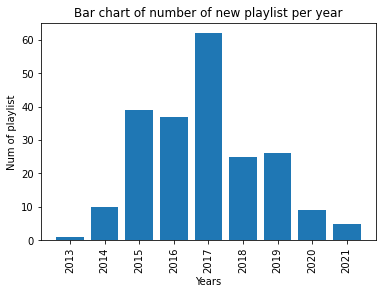

In [37]:
data_playlist = pd.read_csv('Modified Data/playlist.csv', sep='\t')
new_vals=[]
vals = data_playlist['created_at']
for val in vals:
    new_val = dt.datetime.strptime(val, '%Y-%m-%d')
    new_vals.append(new_val)
data_playlist['created_at'] = new_vals

playlist_year= {}
for i in data_playlist['created_at']:
    playlist_year[i.year] = playlist_year.get(i.year, 0) + 1
diff_year = list(playlist_year.keys())
counts = list(playlist_year.values())
plt.bar(diff_year, counts)
plt.xticks(diff_year, rotation = 90)
plt.xlabel('Years')
plt.ylabel('Num of playlist')
plt.title('Bar chart of number of new playlist per year');

- Playlist mới được tạo nhiều ở năm 2017, trong khi ở năm 2017 số lượng người dùng mới khá thấp, số lượng người dùng mới
và playlist mới hầu như không có quan hệ với nhau
- Bên cạnh đó, dữ liệu khá nhỏ để đưa ra câu trả lời chính xác cho câu hỏi đặt ra

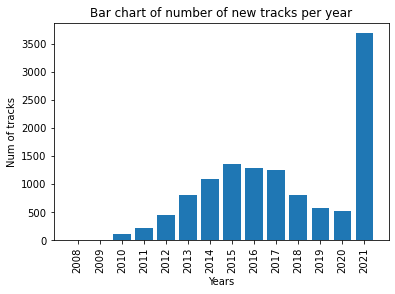

In [38]:
data_tracks = pd.read_csv('Modified Data/track.csv', sep='\t')
new_vals=[]
vals = data_tracks['created_at']
for val in vals:
    new_val = dt.datetime.strptime(val, '%Y-%m-%d')
    new_vals.append(new_val)
data_tracks['created_at'] = new_vals

track_year= {}
for i in data_tracks['created_at']:
    track_year[i.year] = track_year.get(i.year, 0) + 1
diff_year = list(track_year.keys())
counts = list(track_year.values())
plt.bar(diff_year, counts)
plt.xticks(diff_year, rotation = 90)
plt.xlabel('Years')
plt.ylabel('Num of tracks')
plt.title('Bar chart of number of new tracks per year');

- Nhìn vào đồ thị, thấy được số lượng tracks được tạo ra ở năm 2021 nhiều hơn hẳn với các năm khác
- Tuy nhiên dữ liệu được lấy vào năm 2021, ta thấy sự chênh lệch quá lớn giữa năm 2021 và các năm khác nên có thể suy ra dữ liệu khả năng cao bị bias 

### 6. Vào năm nay (2021), các thể loại nào được phổ biến. Có thay đổi so với các năm trước không?

In [39]:
data_tracks['genre'] = data_tracks['genre'].str.lower()
def GenrePerYear(year):
    genre = {}
    for i in range(len(data_tracks['id'])):
        if data_tracks['created_at'][i].year == year:
            if isinstance(data_tracks['genre'][i], str):
                genre[data_tracks['genre'][i]] = genre.get(data_tracks['genre'][i], 0) + 1
    genre= dict(sorted(genre.items(),reverse = True, key=lambda item: item[1]))
    plt.barh(list(genre.keys())[:10][::-1], list(genre.values())[:10][::-1], color = 'orange')
    plt.xlabel('Num of tracks')
    plt.ylabel('Genre')
    plt.title(f'Top 10 genre in {year}');
    plt.show()

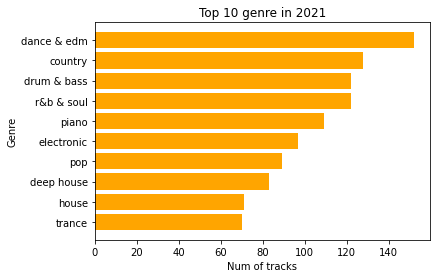

In [40]:
GenrePerYear(2021)

- Năm 2021, những thể loại nhạc thịnh hành nhất được thể hiện ở đồ thị trên, thịnh hành nhất là dance & edm sau đó đến country, drum&bass, r&b & soul...


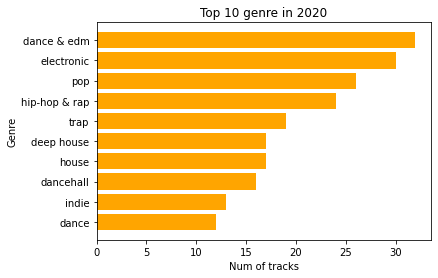

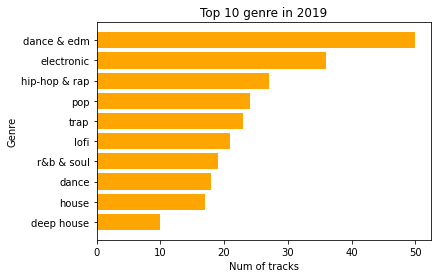

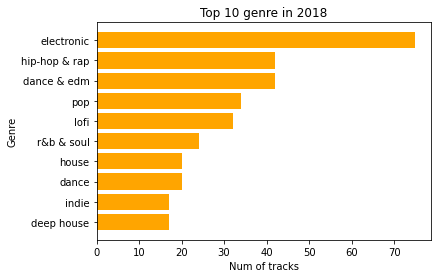

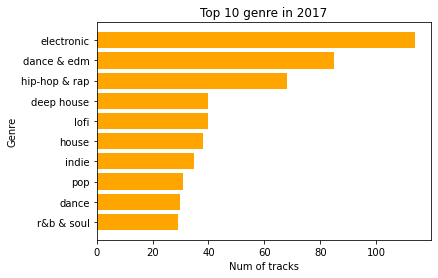

In [41]:
GenrePerYear(2020)
GenrePerYear(2019)
GenrePerYear(2018)
GenrePerYear(2017)

- Ở những năm 2017, 2018, thể loại electronic rất được thịnh hành. Tuy nhiên từ năm 2019, dance & edm đã trở thành thể loại
nhạc thịnh hành nhất. Đặc biệt ở năm 2021, eletronic đã xuống vị trí top 6, không còn được ưa chuộng như các năm trước nữa

### 7. Sự phân bố các bài hát (track) qua các năm để coi sự phân bố số lượng bài hát qua các năm như thế nào và có điều gì bất hợp lí không?

In [42]:
plt.style.use('seaborn')
df_track = pd.read_csv('Modified Data/track.csv',sep='\t')
sorted_playback = df_track.sort_values(by='playback_count',ascending=False)
sorted_likes = df_track.sort_values(by='likes_count',ascending=False)
df_track.head()

,id,title,user_id,genre,created_at,duration,comment_count,download_count,kind,likes_count,playback_count,reposts_count,permalink_url,tag_list,track_format,uri
0,1149426313,Conclusio Catastropha,2832562,Electronic,2021-10-28,372036,6,0,track,161,1936,12,https://soundcloud.com/iceloki/ice-conclusio-c...,EGTS2021,single-track,https://api.soundcloud.com/tracks/1149426313
1,1151626678,Megalovania (in the style of Doom Eternal) fro...,79546796,Metal,2021-11-01,263210,55,0,track,653,9528,68,https://soundcloud.com/geoffplaysguitar/megalo...,"undertale deltarune ""mick gordon"" doom ""doom e...",single-track,https://api.soundcloud.com/tracks/1151626678
2,1155594988,STAY (THE KID LAROI METAL COVER),246016879,Metal,2021-11-07,139703,0,0,track,56,1197,2,https://soundcloud.com/sablemetal/stay-kid-lar...,"""Kid Laroi"" ""Justin Bieber"" Metalcore",single-track,https://api.soundcloud.com/tracks/1155594988
3,1157467549,neurovaniac v4?,584320599,NaN,2021-11-10,23118,13,0,track,61,683,14,https://soundcloud.com/girlwithabigbutt/neurov...,NaN,single-track,https://api.soundcloud.com/tracks/1157467549
4,1155715915,Brutal & Powerful Metal - Background Music,60835736,Metal,2021-11-08,177267,0,1,track,4,54,0,https://soundcloud.com/royaltyfreemusic_alexru...,"Metal ""royalty free"" audiojungle background Mu...",single-track,https://api.soundcloud.com/tracks/1155715915


- Về bộ dữ liệu: 
    - Xác định số liệu trước khi bắt đầu tập trung vào bộ dữ liệu **track.csv** và trường dữ liệu 'crated_at' để xem được có bao nhiêu bài hát qua các năm và biểu diễn chúng lên biểu đồ.
    - Xem xét liệu câu hỏi này có thể trả lời được với dữ liệu có sẵn không thì câu trả lời là **CÓ**. Với một tập dữ liệu **track.csv** gồm hơn 12000 bài hát(tracks) thì đủ dữ liệu để ta có thể xem xét về sự phân bố số lượng các bài hát qua từng năm xem số bài hát có tăng dần theo thời gian hay không, hay nó biến đổi theo một quy luật nào đó?

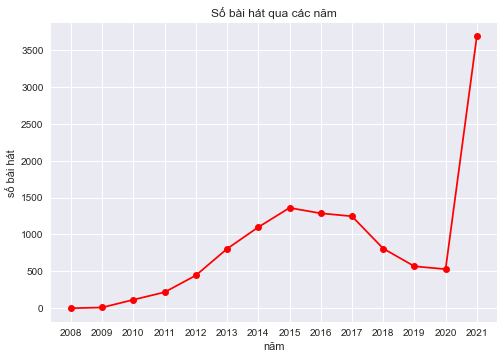

In [43]:
list_year = []
for item in df_track['created_at']:
    list_year.append(item.split('-')[0])

uniq, count = np.unique(list_year, return_counts=True)
plt.plot(uniq, count,'o-', color='red')

plt.ylabel('số bài hát')
plt.xlabel('năm')
plt.title('Số bài hát qua các năm');

- Theo như biểu đồ thể hiện sự phân bố các bài hát qua từng năm, ta thấy rằng số lượng bài hát tăng dần bắt đầu từ năm 2010 đến năm 2015, sau đó bị chững lại từ năm 2015 đến năm 2017 và bắt đầu đi xuống đến năm 2020. Sau đó tăng đột biến vào năm 2021 với số lượng bài hát hơn 3500.
--> Giải thích cho vấn đề này có lẽ là *SoundCloud Discover* tập trung đề xuất những bài nhạc xuất hiện mới nhất, cùng các bài nhạc hay nhất hoặc nhiều người nghe nhất qua từng năm và hiển thị trên trang *SoundCloud Discover*. Nếu giải thích theo giả thiết này thì hơn 30% bài hát hiển thị trên *SoundCloud Discover* là của năm 2021, còn lại 70% bài hát chia ra cho các năm cũ.

---

### 8. Các bài hát không có lượt like(likes_count) và không có lượt nghe lại(playback_count) có những đặc điểm gì? 

#### 8.1 Thống kê thể loại nhạc(genre) của những bài hát mà không có lượt nghe và lượt like nào

* Đầu tiên ta xem thử những thể loại nhạc nào không có người nghe và người thích.

In [44]:
""" Tạo dataframe có số lượt nghe và số lượt thích ít nhất"""
zero_like_count_df = df_track.loc[lambda df: df['likes_count'] == df_track['likes_count'].min()]
zero_like_count_df = zero_like_count_df.reset_index(drop=True)

zero_playback_count_df = df_track.loc[lambda df: df['playback_count'] == df_track['playback_count'].min()]
zero_playback_count_df = zero_playback_count_df.reset_index(drop=True)

In [45]:
""" Từ 2 dataframe vừa tạo ở trên, chuyển kiểu dữ liệu của cột 'genre' về kiểu dữ liệu string
(bởi vì các giá trị có kiểu nan vẫn ở kiểu dữ liệu float"""
for i in range(0, len(zero_like_count_df)):
    zero_like_count_df['genre'][i] = str(zero_like_count_df['genre'][i])
    zero_like_count_df['genre'][i] = zero_like_count_df['genre'][i].lower()

for i in range(0, len(zero_playback_count_df)):
    zero_playback_count_df['genre'][i] = str(zero_playback_count_df['genre'][i])
    zero_playback_count_df['genre'][i] = zero_playback_count_df['genre'][i].lower()

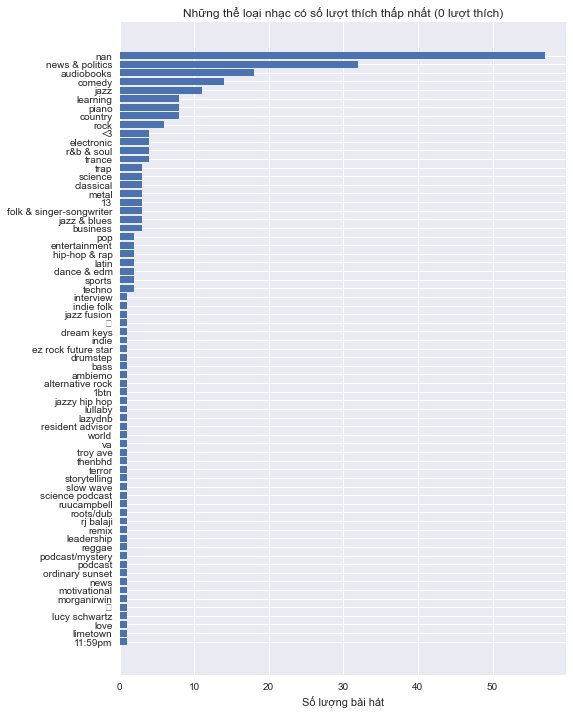

In [46]:
plt.figure(figsize=(8,12))
temp, count = np.unique(zero_like_count_df['genre'], return_counts=True)
sorted_idx = np.argsort(count)
plt.barh(temp[sorted_idx], count[sorted_idx])
plt.title("Những thể loại nhạc có số lượt thích thấp nhất (0 lượt thích)")
plt.xlabel('Số lượng bài hát');

* Nhìn vào số lượng bài hát không có lượt thích(likes_count), ta thấy rằng có tới hơn 50 bài không có thể loại(dữ liệu bị thiếu). Tiếp đến là các thể loại news & politics (tin tức và chính trị), audiobooks,comedy và jazz cùng các genre khác chiếm số ít(khoảng 1,2 bài). 
--> Giải thích cho điều này là do: 
    1. các dữ liệu bị thiếu hoặc là outlier(ta thấy country, rock, electronic, audiobooks,...) vẫn có trong danh sách các thể loại nhạc phổ biến của các quốc gia nhưng lại bị xếp vào những genre có 0 lượt thích và 0 lượt nghe --> outlier.
    2. có những dữ liệu rác(bị làm sai tên hoặc cố ý ghi sai thông tin) như 11:59pm, limetown, lucy schwartz,...
    3. Những thể loại đúng như news & politics (tin tức và chính trị),comedy hay learning không phù hợp với thị hiếu của người nghe SoundCloud nên không có lượt thích nào.

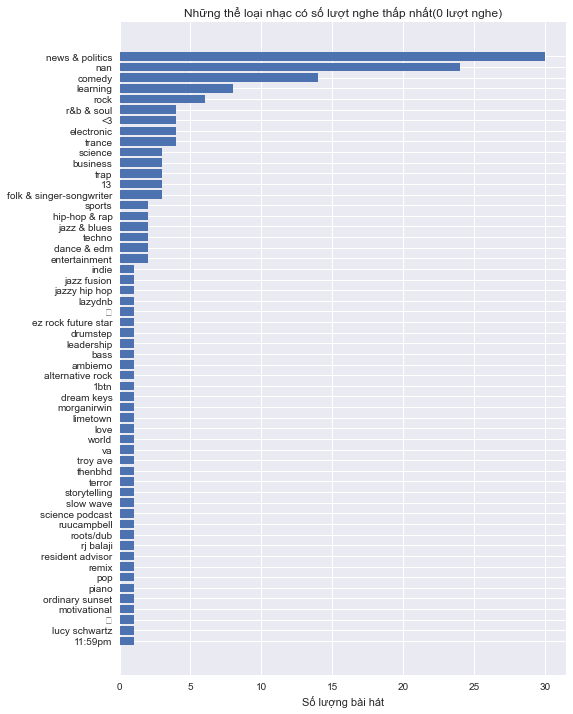

In [47]:
plt.figure(figsize=(8,12))
temp, count = np.unique(zero_playback_count_df['genre'], return_counts=True)
sorted_idx = np.argsort(count)
plt.barh(temp[sorted_idx], count[sorted_idx])
plt.title("Những thể loại nhạc có số lượt nghe thấp nhất(0 lượt nghe)")
plt.xlabel('Số lượng bài hát');

* Sự phân bố số lượt nghe ít nhất từng thể loại cũng tương tự như biểu đồ ở trên, ở đầu bảng vẫn là những thể loại như news & politics (tin tức và chính trị),comedy hay learning.
--> Lí do tương tự như giải thích biểu đồ ở trên. Có thể do outlier và missing value hoặc dữ liệu rác hoặc thị hiếu người nghe.

#### 8.2 Sự phân bố của các bài hát không có lượt nghe và không có lượt like

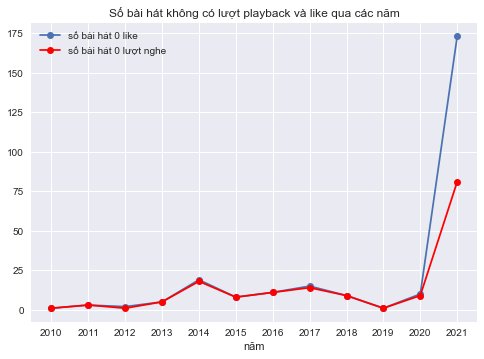

In [48]:
list_year_of_zerolikecount = []
for item in zero_like_count_df['created_at']:
    list_year_of_zerolikecount.append(item.split('-')[0])
x,count = np.unique(list_year_of_zerolikecount, return_counts=True)

plt.plot(x,count,'o-',label='số bài hát 0 like')


list_year_of_zeroplayback = []
for item in zero_playback_count_df['created_at']:
    list_year_of_zeroplayback.append(item.split('-')[0])

x1, count1 = np.unique(list_year_of_zeroplayback, return_counts=True)

plt.plot(x1, count1,'o-', color='red',label='số bài hát 0 lượt nghe')

plt.xlabel('năm')
plt.title('Số bài hát không có lượt playback và like qua các năm')
plt.legend();

- Ta thấy rằng số bài nhạc 0 like 0 playback từ năm 2010 đến năm 2020 đều ở mức dưới 25 bài hát, nhưng tăng đột biến từ năm 2020 đến năm 2021(số bài hát 0 like năm 2021 là 175 bài, số bài hát 0 có lượt nghe năm 2021 là khoảng 85 bài). Để biết nó có phải là outlier hay không thì ta so biễu diễn nó với biểu đồ phân bố số lượng bài hát qua các năm.

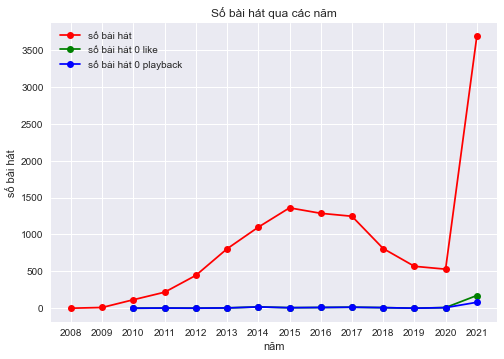

In [49]:
list_year = []
for item in df_track['created_at']:
    list_year.append(item.split('-')[0])

uniq, count = np.unique(list_year, return_counts=True)
plt.plot(uniq, count,'o-', color='red',label='số bài hát')


list_year_of_zerolikecount = []
for item in zero_like_count_df['created_at']:
    list_year_of_zerolikecount.append(item.split('-')[0])
x1,count1 = np.unique(list_year_of_zerolikecount, return_counts=True)

plt.plot(x1,count1,'o-', color='green',label='số bài hát 0 like')

list_year_of_zeroplayback = []
for item in zero_playback_count_df['created_at']:
    list_year_of_zeroplayback.append(item.split('-')[0])

x2, count2 = np.unique(list_year_of_zeroplayback, return_counts=True)

plt.plot(x2, count2,'o-', color='blue',label='số bài hát 0 playback')

plt.ylabel('số bài hát')
plt.xlabel('năm')
plt.title('Số bài hát qua các năm')
plt.legend();


- Nhìn vào biểu đồ trên, ta kết luận rằng số lượng bài hát 0 like và 0 playback qua từng năm là rất nhỏ và tách biệt so với số lượng bài hát qua các năm, suy ra số bài hát 0 like và số bài hát 0 playback ở đây là outlier.

### 9. Mối liên hệ giữa số lượng comment(comment_count) và số lượt nghe cũng như số lượng lượt thích để xem nếu số lượng comment nhiều thì có đồng nghĩa với số lượng lượt nghe nhiều và số lượng lượt thích nhiều hay không?

- Về bộ dữ liệu: 
    - Xác định số liệu trước khi bắt đầu tập trung vào bộ dữ liệu **track.csv** và trường dữ liệu 'comment_count', 'likes_count' và 'playback_count' để vẽ lên mối liên quan giữa 3 trường dữ liệu này. 

In [50]:
sorted_comment = df_track.sort_values(by='comment_count',ascending=False)
sorted_comment.head()

,id,title,user_id,genre,created_at,duration,comment_count,download_count,kind,likes_count,playback_count,reposts_count,permalink_url,tag_list,track_format,uri
1654,501876756,Lil Peep & XXXTENTACION - Falling Down,70601494,Alternative Rock,2018-09-19,196206,182675,0,track,2023159,137216658,69076,https://soundcloud.com/lil_peep/lil-peep-ft-xx...,"""lil peep"" xxxtentacion ""falling down""",single-track,https://api.soundcloud.com/tracks/501876756
12120,631331493,이 밤 by JIN of BTS,30994369,NaN,2019-06-04,178929,166499,1001,track,944539,49080644,81279,https://soundcloud.com/bangtan/tonightbyjin,진 BTS 이밤 tonight,single-track,https://api.soundcloud.com/tracks/631331493
4725,373180994,All Girls Are The Same,132790246,Hip Hop,2017-12-22,30000,89194,0,track,1939940,194914431,69405,https://soundcloud.com/uiceheidd/all-girls-are...,NaN,single-track,https://api.soundcloud.com/tracks/373180994
2032,539018871,Old Town Road (I Got The Horses In The Back) [...,174817271,Country,2018-12-03,113068,53869,0,track,1245760,100015162,31769,https://soundcloud.com/secret-service-86200728...,"""Red Dead Redemption"" ""country trap"" ""country ...",single-track,https://api.soundcloud.com/tracks/539018871
12132,634448904,Euphoria (DJ Swivel Forever Mix)by JK,30994369,NaN,2019-06-10,238729,49607,1003,track,611158,23648817,42176,https://soundcloud.com/bangtan/euphoria2019festa,BTS JK 정국 방탄소년단 유포리아 Euphoria,single-track,https://api.soundcloud.com/tracks/634448904


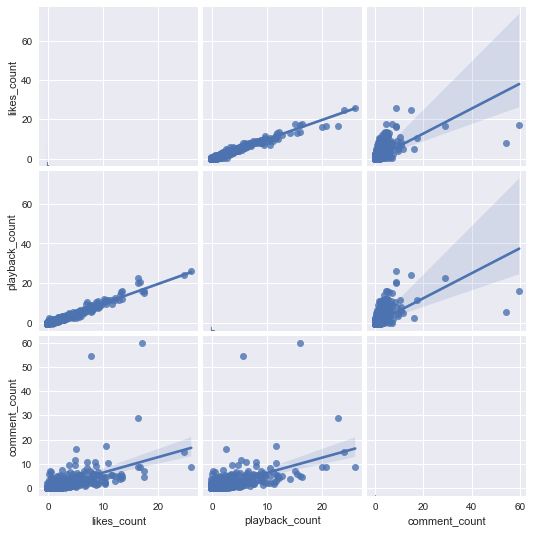

In [51]:
data = df_track[['likes_count', 'playback_count', 'comment_count']]
data['likes_count'] = (data['likes_count'] - data['likes_count'].mean()) / data['likes_count'].std()            #Normalization
data['playback_count'] = (data['playback_count'] - data['playback_count'].mean()) / data['playback_count'].std()#Normalization
data['comment_count'] = (data['comment_count'] - data['comment_count'].mean()) / data['comment_count'].std()    #Normalization
sns.pairplot(data, kind="reg");

- Nhìn vào biểu đồ Correlogram trên(các dữ liệu đã được chuẩn hóa(normalization)), ở cả biểu đồ **(likes_count & comment_count)** và **(playback_count & comment_count)** ta thấy rằng đa số bài hát tập trung ở gốc tọa độ (0,0) đến (10,10) và càng ra xa trục tọa độ thì càng thưa dần. Số lượt like và playback càng tăng thì số lượt comment cũng càng tăng lên chứng tỏ comment_count và likes_count, playback_count tỉ lệ thuận với nhau.
---

- Để nhìn rõ hơn, ta vẽ biểu đồ scatter để thể hiện sự phụ thuộc của comment_count và playback_count cũng như comment_count và likes_count.

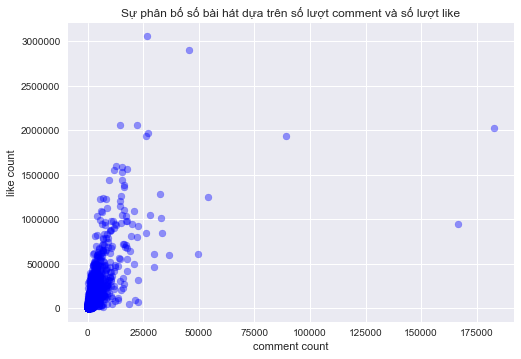

In [52]:
plt.scatter(df_track['comment_count'],df_track['likes_count'],color='blue',alpha=0.4)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('comment count')
plt.ylabel('like count')
plt.title('Sự phân bố số bài hát dựa trên số lượt comment và số lượt like');

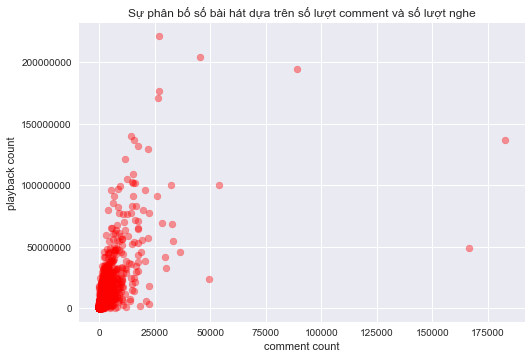

In [53]:
plt.scatter(df_track['comment_count'], df_track['playback_count'],color='red',alpha=0.4)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('comment count')
plt.ylabel('playback count')
plt.title('Sự phân bố số bài hát dựa trên số lượt comment và số lượt nghe');

- Nhìn vào 2 biểu đồ trên, ta thấy chúng khá tương tự nhau và cũng thể hiện rõ ràng là khi lượt nghe và lượt like càng tăng thì lượt comment cũng tăng theo theo tỉ lệ thuận. --> Bài hát nào càng nổi tiếng, càng có nhiều lượt nghe lượt thích thì cũng kèm theo đó là lượt comment tăng.

### 10. Top 10 tracks, playlists theo từng năm.

***
#### Trả lời những câu hỏi về bộ dữ liệu và ngữ cảnh của vấn đề đưa ra.

> - Ta sẽ chỉ sử dụng dữ liệu từ hai file là track và playlist.
> - Đối với BXH Top 10 track trong năm, ta sẽ dựa trên hai yếu tố cụ thể nhất là lượt nghe và lượt thích để đánh giá.
> - Đối với BXH Top 10 playlist trong năm, ta sẽ chỉ dựa trên số lượt thích playlist. Bởi vì một playlist gồm rất nhiều bài hát và thường sẽ được thích hay không dựa vào sự liên quan giữa chủ đề, thể loại của tất cả bài hát trong playlist đó. Do sự khác biệt về mặt số lượng bài hát trong mỗi playlist nên tiêu chí đánh giá dựa trên lượt nghe là không phản ánh đúng. Ta sẽ lập các BXH theo lượt thích của playlist.
> - Dữ liệu trong các file đều đáp ứng đủ các yếu tố để thống kê các BXH.
> - Sử dụng **Bar plot chart** vì đây là biểu đồ phù hợp nhất dùng cho ranking các BXH âm nhạc.

***
#### Tiêu chí đánh giá

> - Ở đây sẽ chỉ đánh giá dựa trên duy nhất số lượt nghe, lượt thích trên BXH.
> - Các số liệu lượt nghe và lượt thích đều là được tính cho đến thời điểm hiện tại chứ không chỉ tính riêng trong năm đó.
> - Tuy nhiên có một sự thật là số lượt nghe, lượt thích của một bài hát sẽ hầu hết có vào thời điểm nó phát hành. Thời gian sau con số này sẽ tăng nhưng con số tăng là không đáng kể.
> - Những giả định như là một ca khúc ra từ lâu thì sẽ có nhiều thời gian để người khác nghe hơn và lượt nghe, lượt thích sẽ cao hơn là không có căn cứ. Thực tế thì một bài hát thời điểm hiện tại sẽ nhiều lượt nghe, lượt thích hơn ngày xưa với các sự ảnh hưởng khác như điều kiện, phương tiện, các yếu tốt mang tính thời đại....

***
#### Tiền xử lý dữ liệu

- **Kiểm tra dữ liệu trùng lặp. Ở đây sẽ mặc định xét theo id vì mỗi track, playlist đều có một id riêng.**

In [54]:
if len(track['id']) != len(set(track['id'])):
    duplicated_idTrack = True;
else:
    duplicated_idTrack = False;
    
if len(playlist['id']) != len(set(playlist['id'])):
    duplicated_idPlaylist = True;
else:
    duplicated_idPlaylist = False;

In [55]:
# TEST
assert duplicated_idTrack == False
assert duplicated_idPlaylist == False

- **Tất cả các cột đều có kiểu dữ liệu là string, int. Chỉ cần đổi ngày phát hành từ string sang datetime để xử lí dữ liệu.**

In [56]:
for i in range(0, len(track['created_at'])):
    track['created_at'][i] = dt.datetime.strptime(track['created_at'][i], "%Y-%m-%d")
for i in range(0, len(playlist['created_at'])):
    playlist['created_at'][i] = dt.datetime.strptime(playlist['created_at'][i], "%Y-%m-%d")

- **Sắp xếp DataFrame theo thứ tự các ngày phát hành track từ xưa đến nay.**

In [57]:
track = track.sort_values(by='created_at', ignore_index=True)
track.head()

,id,title,user_id,genre,created_at,duration,comment_count,download_count,kind,likes_count,playback_count,reposts_count,permalink_url,tag_list,track_format,uri
0,56066,Depeche Mode - Enjoy the Silence (Growling Mac...,31030,trance,2008-11-04 00:00:00,468140,1205,0,track,43290,2889757,3835,https://soundcloud.com/growlingmachines/depech...,NaN,single-track,https://api.soundcloud.com/tracks/56066
1,311596,Gorillaz - feel good inc (drum and bass remix),58764,pop mixers,2009-06-03 00:00:00,408685,2371,183,track,94168,4991613,4709,https://soundcloud.com/photon-snake/gorillaz-f...,Hip hop pop,single-track,https://api.soundcloud.com/tracks/311596
2,354591,01 That Was Just Your Life,151872,NaN,2009-06-23 00:00:00,432431,4,0,track,790,70187,46,https://soundcloud.com/hatchetfreak/01-that-wa...,NaN,single-track,https://api.soundcloud.com/tracks/354591
3,473275,Bonecrusher - I Ain't Never Scared (Football R...,200871,NaN,2009-08-07 00:00:00,237322,53,100,track,3528,315016,241,https://soundcloud.com/jhood80/bonecrusher-i-a...,NaN,single-track,https://api.soundcloud.com/tracks/473275
4,525724,Hygher Baby - Let U Go (DJ Asparagus Dirty Dow...,8314,soul,2009-08-23 00:00:00,159991,46,0,track,4335,398733,229,https://soundcloud.com/djasparagus/hygher-baby...,NaN,single-track,https://api.soundcloud.com/tracks/525724


In [58]:
playlist = playlist.sort_values(by='created_at', ignore_index=True)
playlist.head()

,id,title,genre,duration,created_at,likes_count,reposts_count,kind,permalink,permalink_url,uri,user_id,tag_list,track_count,trackIds
0,14152555,Study Electronic Chill,Electronic,15844123,2013-11-09 00:00:00,10942,582,playlist,study-electronic-chill,https://soundcloud.com/randy-gerard-c-r/sets/s...,https://api.soundcloud.com/playlists/14152555,54086345,Chill Study,38,"24412995,89889214,35247650,70380370,6693130,93..."
1,32534743,EDM remixes of popular songs,Electronic,9483098,2014-04-28 00:00:00,21016,652,playlist,trap-remixes-of-popular-songs,https://soundcloud.com/austin24heck/sets/trap-...,https://api.soundcloud.com/playlists/32534743,79816260,Grime Trap Popular Edm Remix EDM Party House T...,40,"225257874,248359385,107689082,220273900,129476..."
2,36114054,#Workout #Electronic,Electronic,25411168,2014-05-22 00:00:00,23400,1271,playlist,workout,https://soundcloud.com/tere-mancha/sets/workout,https://api.soundcloud.com/playlists/36114054,20547708,workout,97,"4863682,394945092,145897691,95197881,111117742..."
3,50538197,My Party Be Like..,Party,10213814,2014-09-12 00:00:00,4711,242,playlist,my-party-be-like,https://soundcloud.com/its-jezika-bruh/sets/my...,https://api.soundcloud.com/playlists/50538197,81561939,House Trap Dance Bass,39,"125864370,166183534,156966503,140237290,149174..."
4,51957607,Chillax Mood,Chillout,5864037,2014-09-22 00:00:00,170379,10646,playlist,chillax-mood,https://soundcloud.com/its-jezika-bruh/sets/ch...,https://api.soundcloud.com/playlists/51957607,81561939,Chill Beautiful Relax,21,"143729872,156864414,156850774,161980476,956844..."


- **Hiện thị các năm kể từ khi track đầu tiên xuất hiện**

In [59]:
range(track['created_at'][0].year, track['created_at'][len(track) - 1].year + 1)

range(2008, 2022)

> Như vậy đối với các track, ta sẽ thống kê các BXH từ năm 2008 tới năm 2021.

- **Hiển thị các năm kể từ khi playlist đầu tiên xuất hiện**

In [60]:
range(playlist['created_at'][0].year, playlist['created_at'][len(playlist) - 1].year + 1)

range(2013, 2022)

> Đối với các playlist, ta sẽ thống kê các BXH từ năm 2013 tới năm 2021.

***
#### Xử lý track

In [61]:
# Hàm lấy thông tin tất cả các track trong năm:
def getTrackInYear(year):
    data = []
    for i in range(0, len(track)):
        if(year == track.iloc[i]['created_at'].year):
            data.append(track.iloc[i])
    return data

# Hàm lấy top 10 tracks theo lượt nghe 
def getTop10Track_byPlayBack(data):
    df = pd.DataFrame(data)
    df = df.sort_values(by='playback_count',ascending=False, ignore_index=True)
    return df.head(10)

# Hàm lấy top 10 tracks theo lượt thích 
def getTop10Track_byLike(data):
    df = pd.DataFrame(data)
    df = df.sort_values(by='likes_count',ascending=False, ignore_index=True)
    return df.head(10)

# Hàm vẽ track chart:
def drawTrackChart(df, _type):
    #Type = 0 sẽ vẽ BXH theo playback count
    #Type = 1 sẽ vẽ BXH theo like count
    if _type == 0:
        df = df.sort_values(by='playback_count',ascending=True, ignore_index=True)
        title = 'TOP 10 TRACKS BY PLAYBACKS COUNT'
        plt.barh(df['title'], df['playback_count'], color= "lightblue")
        plt.title(title, color="darkblue")
        plt.ylabel('Track', color="darkblue")
        plt.xlabel('Playbacks', color="darkblue")
    else: 
        df = df.sort_values(by='likes_count',ascending=True, ignore_index=True)
        title = 'TOP 10 TRACKS BY LIKES COUNT'
        plt.barh(df['title'], df['likes_count'], color= "lightblue")
        plt.title(title, color="darkblue")
        plt.ylabel('Track', color="darkblue")
        plt.xlabel('Likes', color="darkblue")
    
    plt.show()
    
# Hàm tổng hợp:
def Top10Track(year):
    data = []
    data = getTrackInYear(year)
    df1 = getTop10Track_byPlayBack(data)
    drawTrackChart(df1, 0)
        
    df2 = getTop10Track_byLike(data)
    drawTrackChart(df2, 1)

***
#### Xử lý playlist

In [62]:
# Hàm lấy thông tin tất cả các playlist trong năm:
def getPlaylistInYear(year):
    data = []
    for i in range(0, len(playlist)):
        if(year == playlist.iloc[i]['created_at'].year):
            data.append(playlist.iloc[i])
    return data

# Hàm lấy top 10 playlists theo lượt thích:
def getTop10Playlist_byLike(data):
    df = pd.DataFrame(data)
    df = df.sort_values(by='likes_count',ascending=False, ignore_index=True)
    return df.head(10)

# Hàm vẽ playlist chart:
def drawPlaylistChart(df):
    df = df.sort_values(by='likes_count',ascending=True, ignore_index=True)
    title = 'TOP 10 PLAYLISTS BY LIKES COUNT'
    plt.barh(df['title'], df['likes_count'], color= "lightblue")
    plt.title(title, color = "darkblue")
    plt.ylabel('Playlist', color = "darkblue")
    plt.xlabel('Likes', color = "darkblue")
    plt.show()
    
# Hàm tổng hợp:
def Top10Playlist(year):
    data = []
    data = getPlaylistInYear(year)
    df = getTop10Playlist_byLike(data)
    drawPlaylistChart(df)

***
### 11. Tiến hành thống kê qua từng năm

#### Trong năm 2008 

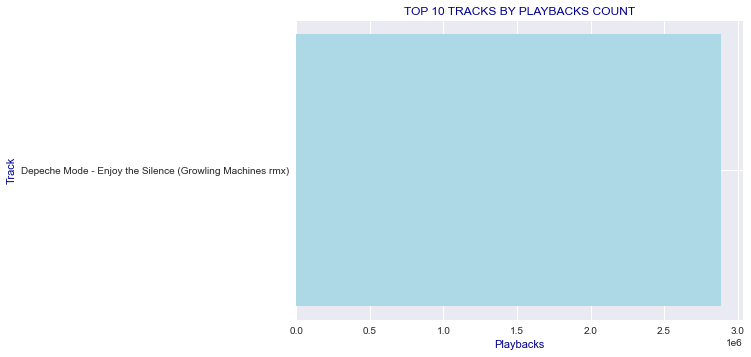

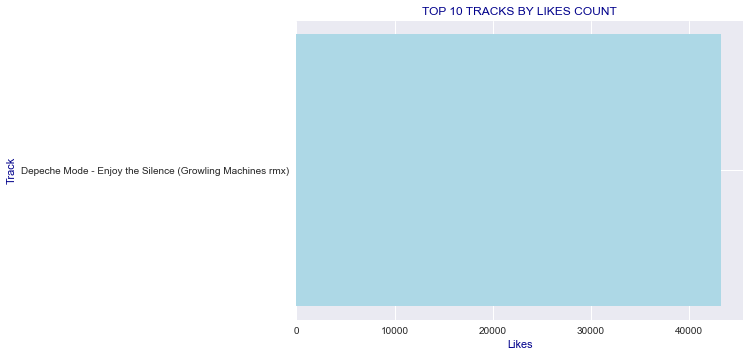

In [63]:
Top10Track(2008)

> - Ở năm này là những năm đầu thành lập SoundCloud nên chỉ có 1 track duy nhất với gần 3 triệu lượt nghe và hơn 400.000 lượt thích.
> - Chưa thể có một BXH top 10 hoàn chỉnh ở năm 2008.

#### Trong năm 2009

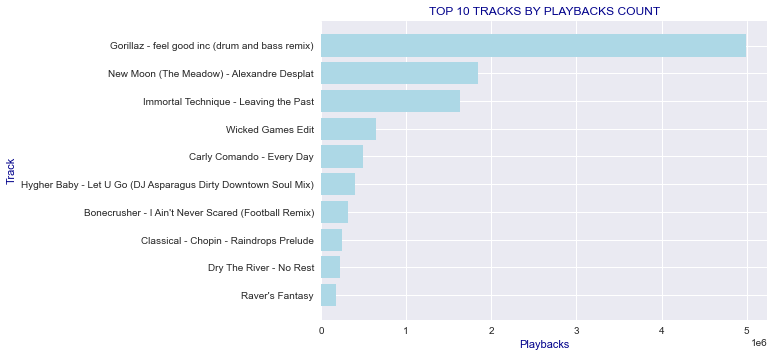

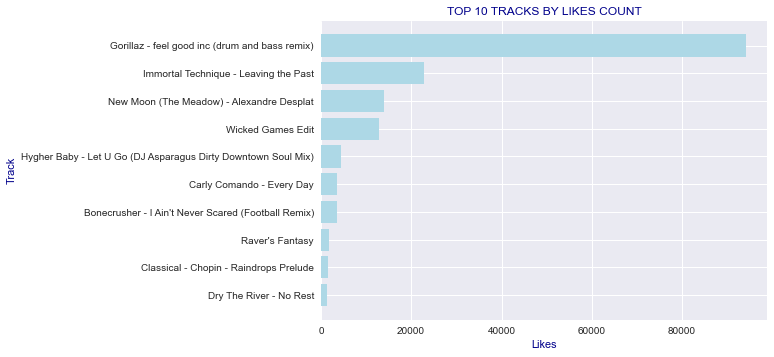

In [64]:
Top10Track(2009)

> - Đến năm 2009 thì số track đã tăng đáng kể, đủ cho một bảng xếp hạng top 10.
> - Hầu hết các track đều đến từ US-UK, dễ hiểu vì thời điểm này SounCloud vẫn còn khá xa lạ với các nước châu Á.
> - Lượt nghe và lượt thích ở từng vị trí trên bảng xếp hạng vẫn còn khoảng cách rất lớn.
> - Ở những vị trí cuối bảng xếp hạng thì con số lượt nghe và lượt thích vẫn còn rất ít, chứng tỏ SoundCloud vẫn chưa thật sự phổ biến.

#### Trong năm 2010

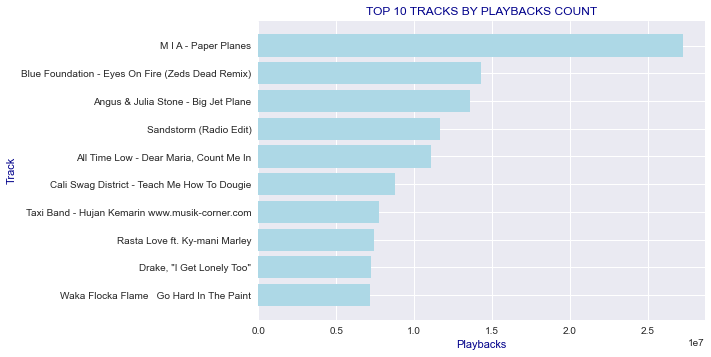

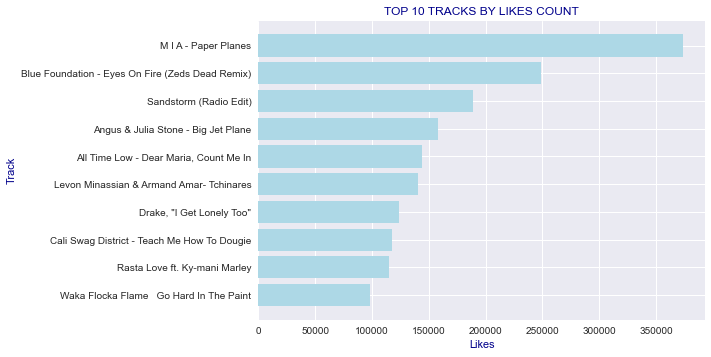

In [65]:
Top10Track(2010)

> - Lượt nghe tăng gấp nhiều lần lên đến hàng chục triệu ở vị trí đầu tiên. Bên cạnh đó số lượt thích cũng có sự tăng gấp nhiều lần.
> - Ở ví trí cuối của bxh lúc này số lượt nghe cũng đã lên mức hàng triệu và lượt thích cũng chạm mốc hàng trăm ngàn.
> - Khoảng cách về lượt nghe và lượt thích đã không còn quá lớn giữa các vị trí.
> - Đến năm 2010, có thể thấy rằng số người sử dụng SoundCloud đã tăng lên một cách đáng kể.
> - Tuy nhiên vẫn chưa thấy sự xuất hiện của các nền âm nhạc khác đến từ châu lục khác mà vẫn chỉ xoay quanh nền âm nhạc US-UK.

#### Trong năm 2011 

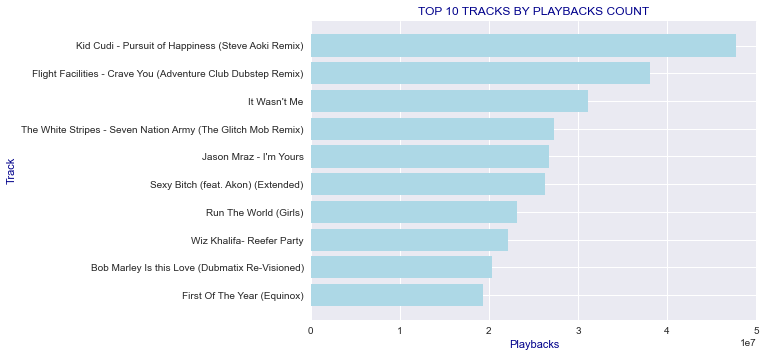

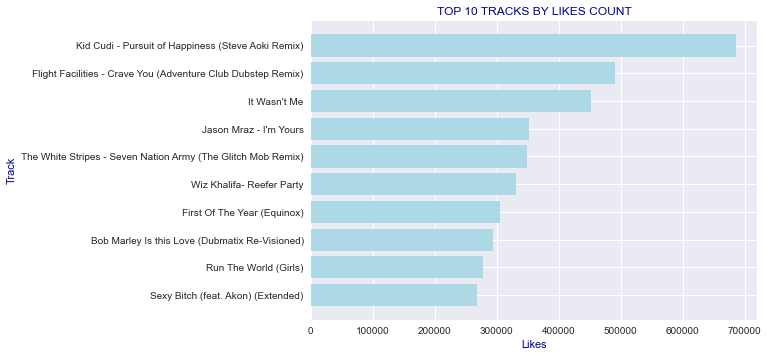

In [66]:
Top10Track(2011)

> - Có thể thấy rằng số lượt nghe ở bảng xếp hạng đang tăng lên theo cấp số nhân.
> - Top 1 đã có được số lượt nghe gần 50.000.000 và lượt thích gần 700.000
> - Đáng chú ý hơn nữa, ở những vị trí cuối của bxh đã có lượt nghe và thích gần chạm mốc vị trí đầu của bxh năm trước.
> - Số người sử dụng SoundCloud lúc này là tăng lên gấp rất nhiều lần nếu tính tất cả các track ngoài bảng xếp hạng.

#### Trong năm 2012 

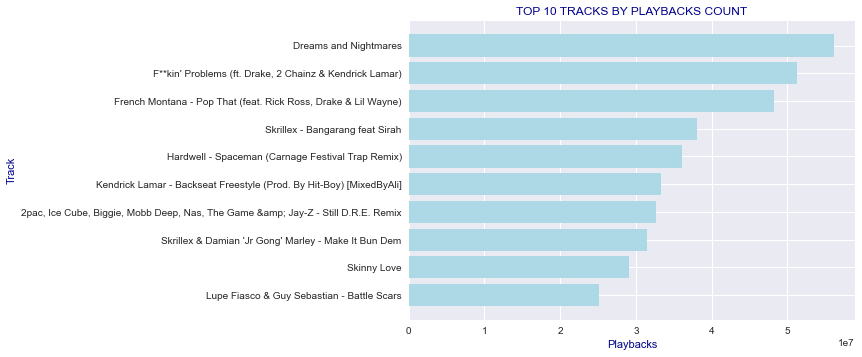

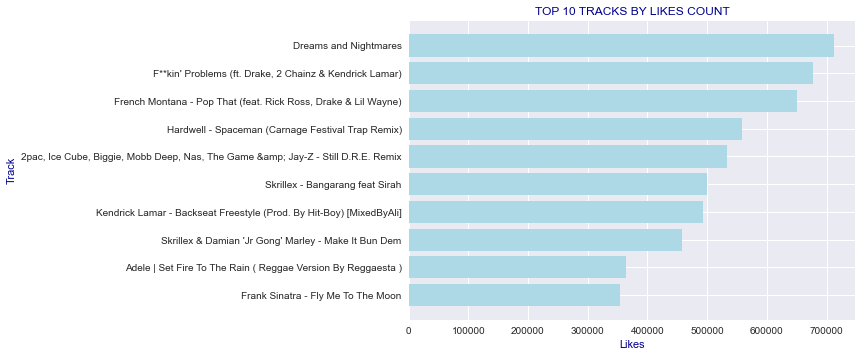

In [67]:
Top10Track(2012)

> - Ở bảng xếp hạng năm 2012, số lượt nghe và lượt thích vẫn tăng dần.
> - Khoảng cách giữa các vị trí là không còn lớn, minh chứng rằng những track được lọt vào bảng xếp hạng SoundCloud lúc này là những track thật sự chất lượng.
> - Một điểm chung của những bxh năm qua là các track trong top bxh lượt nghe cũng đều sẽ nằm trong top bxh lượt thích, chỉ có sự xáo trộn đôi chút ở vị trí. Chứng minh lượt nghe và lượt thích có sự tỉ lệ thuận với nhau.

#### Trong năm 2013 

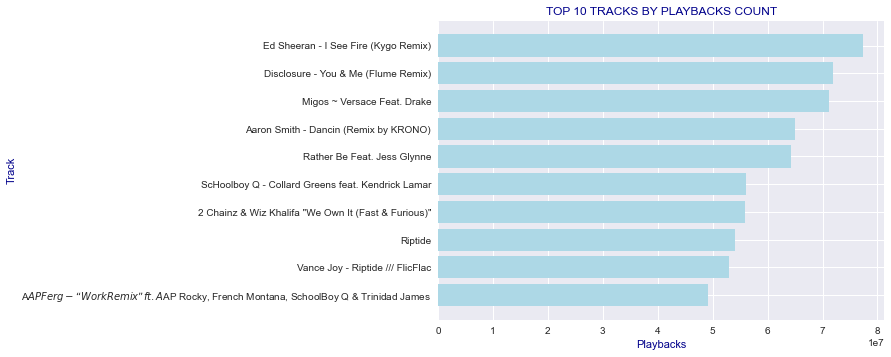

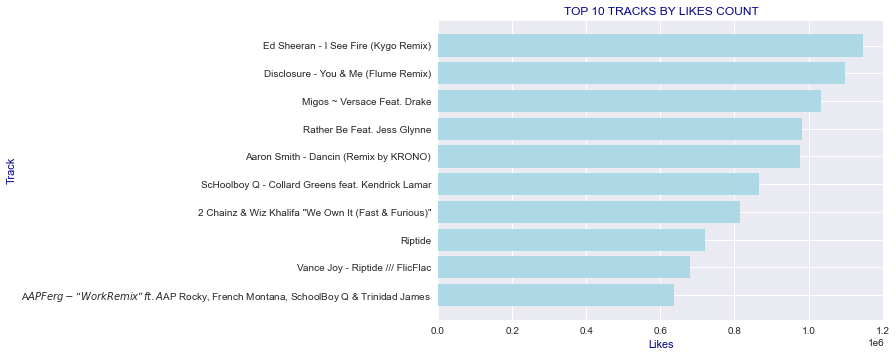

In [68]:
Top10Track(2013)

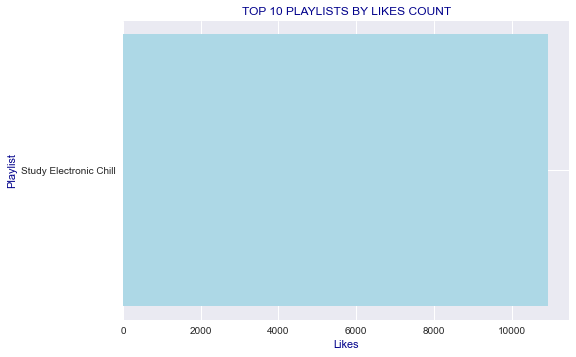

In [69]:
Top10Playlist(2013)

> - BXH các track lại có một bước đột phá, hàng chục triệu lượt nghe cho từng track và đặc biệt là những track đứng đầu đã vượt ngưỡng triệu lượt thích.
> - Bên cạnh các con số ấn tượng đó, trong năm 2013 SoundCloud đã có thêm một khái niệm gọi là Playlist-nơi chứa nhiều track khác nhau của cùng một user.
> - Với sự xuất hiện của chỉ 1 playlist duy nhất trong năm này nên cũng không có gì để thống kê, đây chỉ như là một lời chào và cùng chờ xem playlist sẽ có ảnh hưởng như thế nào vào những năm sau.
> - Cái tên SoundCloud lúc này đã được biết đến rất rộng rãi dựa vào thành tích ấn tượng của nó.

#### Trong năm 2014 

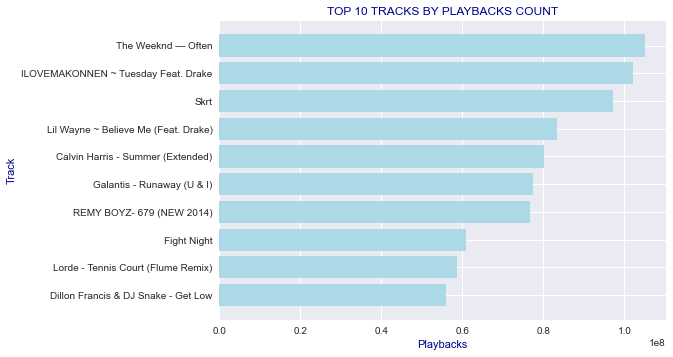

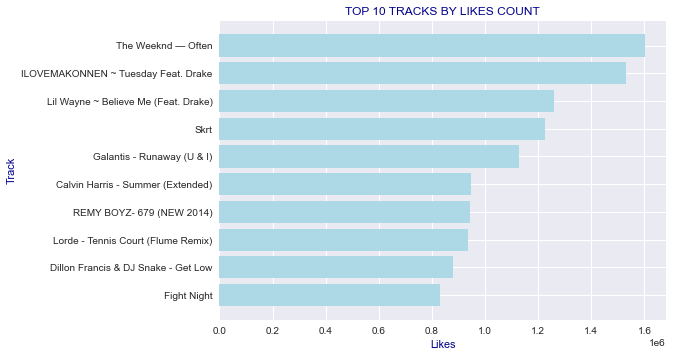

In [70]:
Top10Track(2014)

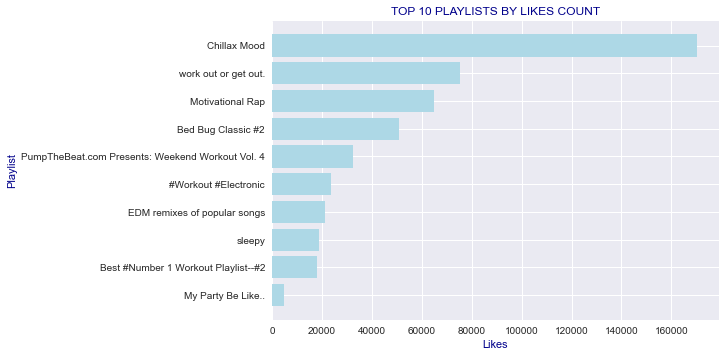

In [71]:
Top10Playlist(2014)

> - Một cột mốc mới được thiết lập với con số trăm triệu lượt nghe cho các track top 1 và top 2.
> - Ở BXH theo lượt thích, track đứng vị trí thứ 10 lúc này đã có hơn 800.000 lượt thích.
> - Đối với các playlist, lúc này số playlist đã tăng đáng kể. Tuy nhiên để có thể có được một BXH đúng chuẩn thì vẫn chưa do đây chỉ mới là năm thứ 2 SoundCloud cho xuất hiện playlist.
> - Các playlist trong BXH vẫn còn khoảng cách khá xa hay nói cách khác là chúng vẫn chưa thật sự chất lượng để nằm trong một BXH.
> - Năm 2014 thì có thể nói SoundCloud sở hữu một lượng người dùng khổng lồ và dần khẳng định tên tuổi của mình.

#### Trong năm 2015 

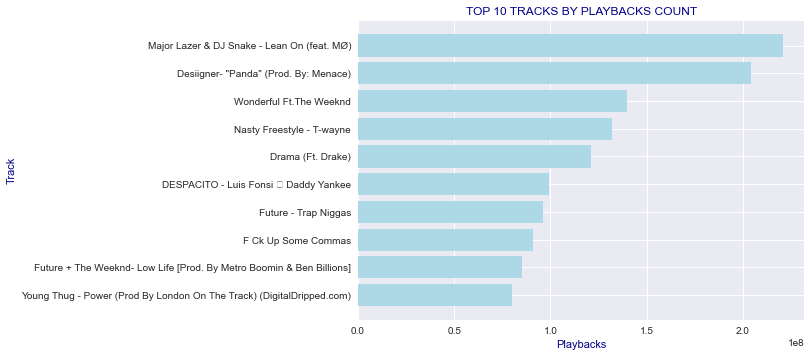

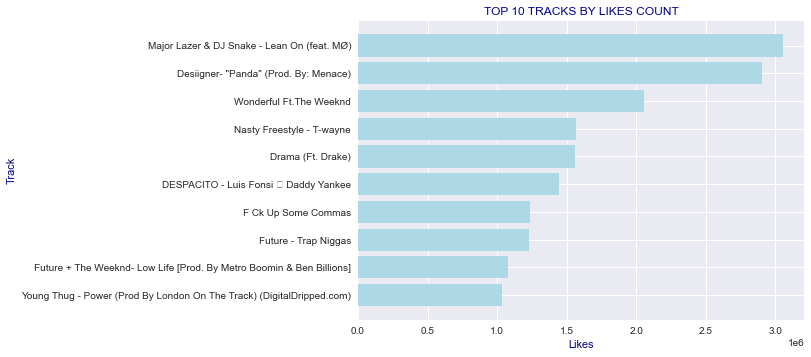

In [72]:
Top10Track(2015)

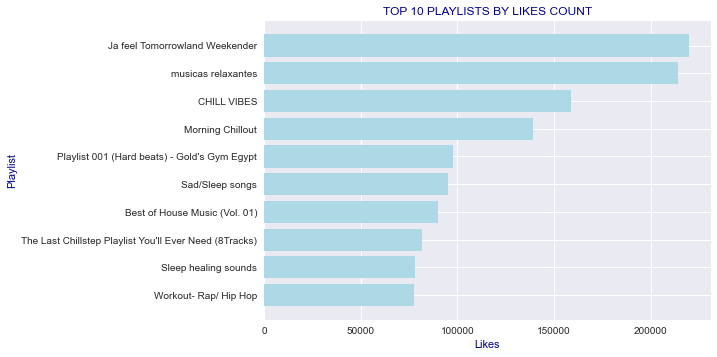

In [73]:
Top10Playlist(2015)

> - Hơn 200.000.000 lượt nghe và hơn 3.000.000 lượt thích ở mức cao nhất trên BXH là những con số biết nói để chỉ ra rằng SoundCloud đang tăng số người sử dụng nền tảng của mình lê một cách chóng mặt.
> - Nếu ta có lấy rộng hơn ở một BXH top 50 thì tin rằng các track ở đó cũng là rất chất lượng.
> - BXH playlist đã có số lượt thích tăng đáng kể, thấp nhất lúc này cũng đã có hơn 75.000 lượt thích.
> - SoundCloud trong năm 2015 đã là một nền tảng quen thuộc với người dùng trên thế giới.

#### Trong năm 2016 

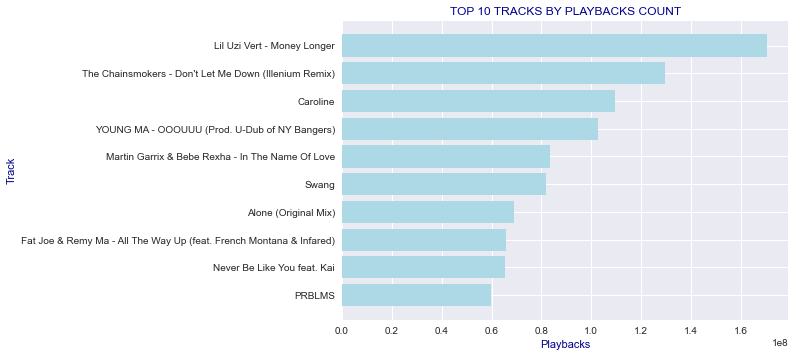

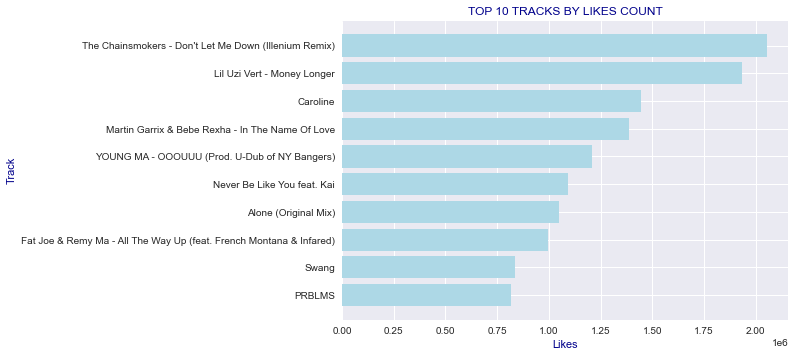

In [74]:
Top10Track(2016)

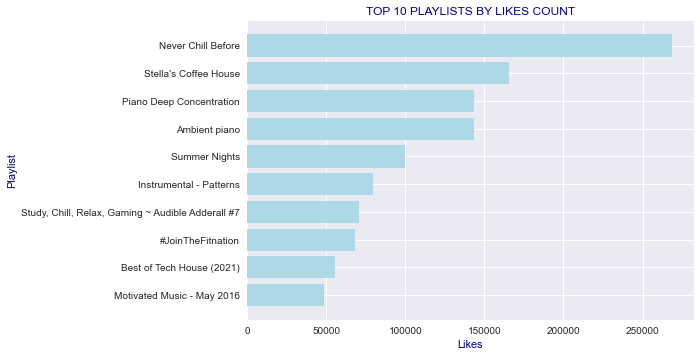

In [75]:
Top10Playlist(2016)

> - Các BXH track và BXH playlist đều có lượt nghe và lượt thích cao ngất ngưỡng như năm 2015.
> - Tuy rằng có một chút giảm về số liệu nhưng đó có thể là do độ hot của bài hát, nhìn chung lượt nghe và thích của các ca khúc trên bảng xếp hạng đều ở mức rất cao.
> - SoundCloud vẫn giữ được (hoặc thậm chí là tăng) số lượng người tin dùng nền tảng nghe nhạc của họ, đây cũng là một điều mà rất nhiều nền tảng nghe nhạc khác không làm được.

#### Trong năm 2017

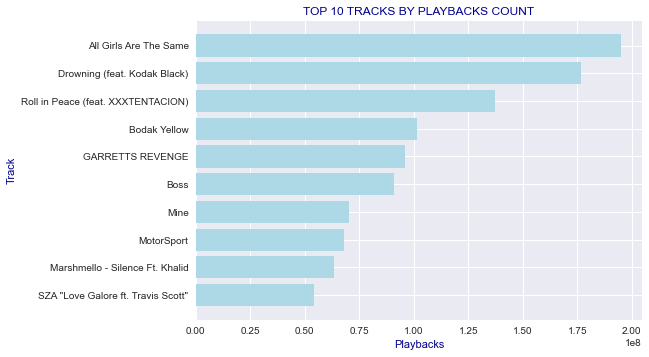

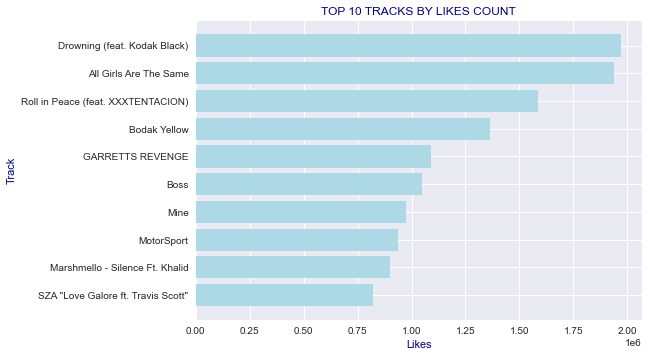

In [76]:
Top10Track(2017)

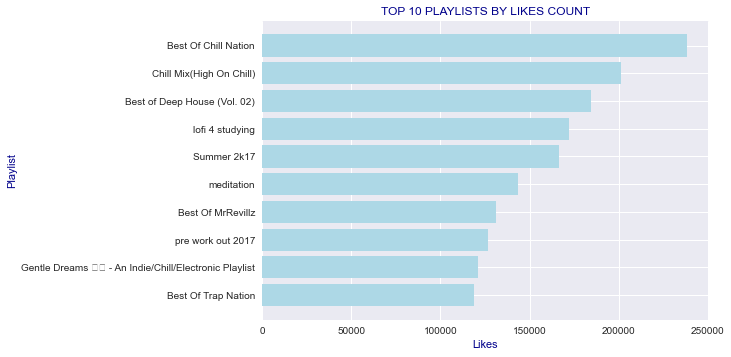

In [77]:
Top10Playlist(2017)

> - BXH các track có sự tương đồng so với năm trước.
> - BXh top 10 playlist có sự đồng đều hơn, khoảng cách về lượt thích giữa các vị trí dần được thu hẹp cho thấy người dùng bắt đầu có sự quan tâm dành cho playlist.

#### Trong năm 2018

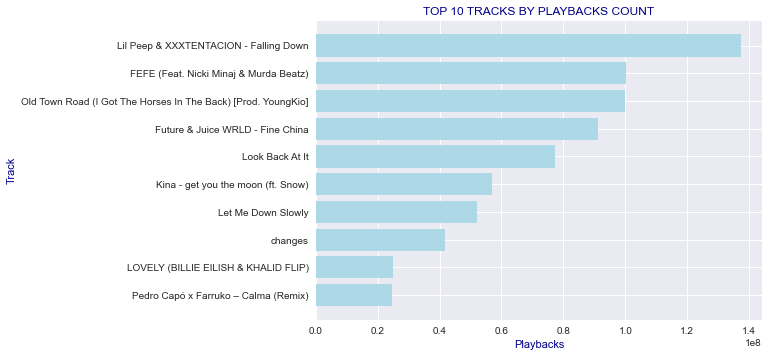

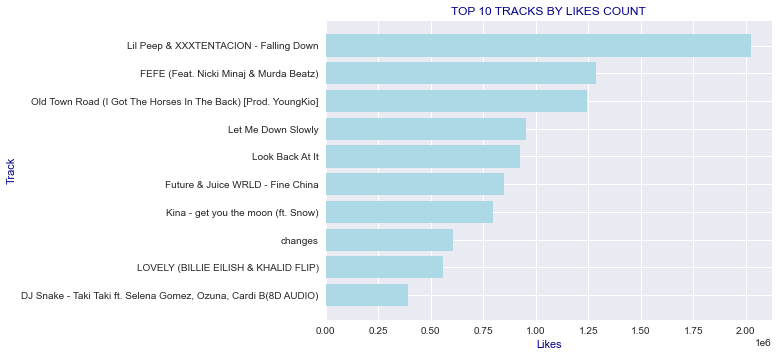

In [78]:
Top10Track(2018)

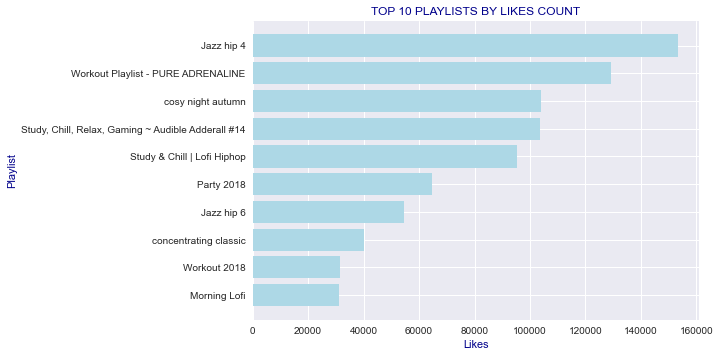

In [79]:
Top10Playlist(2018)

> - Về số lượt nghe và lượt thích ở các BXH, số liệu trong năm 2018 vẫn cho thấy rằng lượng người dùng của họ vẫn ở mức rất cao như các năm trước.
> - Điều đáng nói là những track vẫn chỉ đến từ US UK và phải chăng người châu Á vẫn chưa thật sự ưu tiên sử dụng SoundCloud. Nói như vậy là bởi vì tại châu Á có những nền âm nhạc thuộc top đầu thế giới như Hàn Quốc, Trung Quốc,...

#### Trong năm 2019

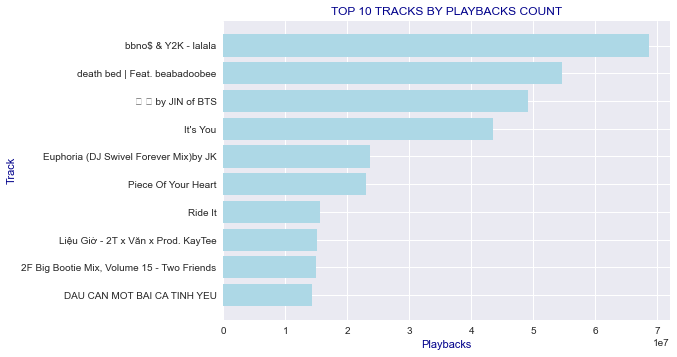

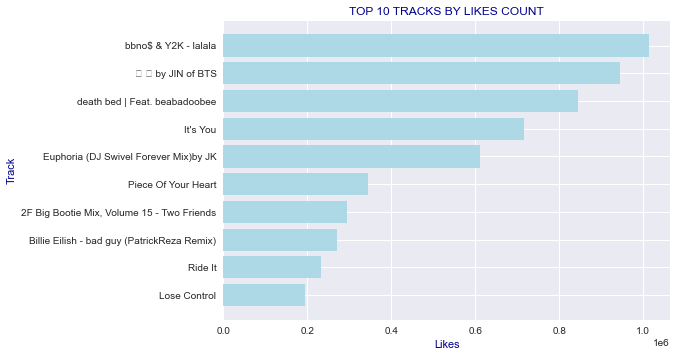

In [80]:
Top10Track(2019)

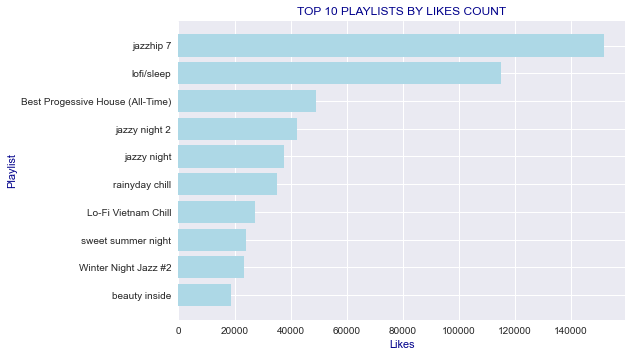

In [81]:
Top10Playlist(2019)

> - Đã có sự xuất hiện của nền âm nhạc đến từ châu Á.
> - Đặc biệt, ở BXH các track theo lượt nghe và BXH các playlist theo lượt thích đã có sự xuất hiện của âm nhạc Việt Nam.
> - Điều đó cho thấy người châu Á nói chung và người Việt Nam nói riêng đã thực sự coi SoundCloud là một nền tảng âm nhạc yêu thích để sử dụng.

#### Trong năm 2020

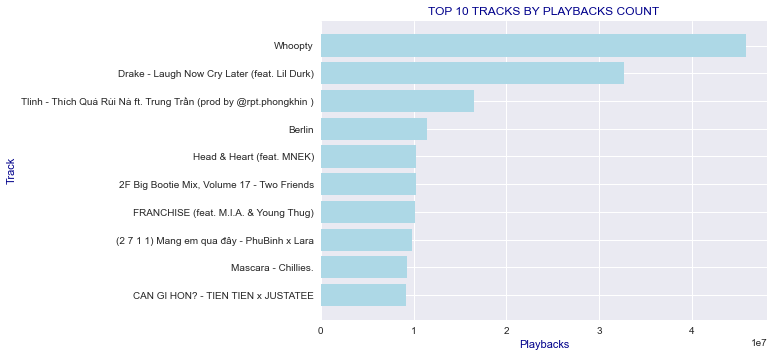

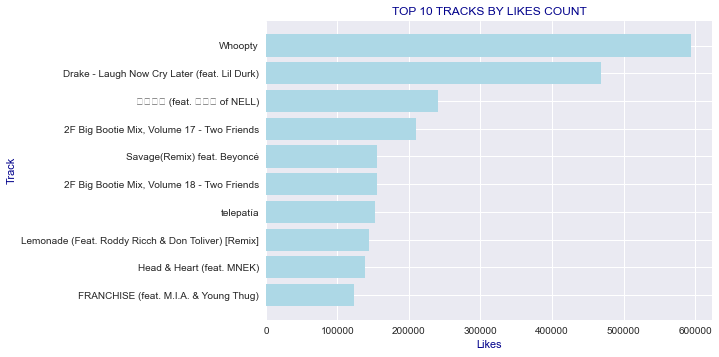

In [82]:
Top10Track(2020)

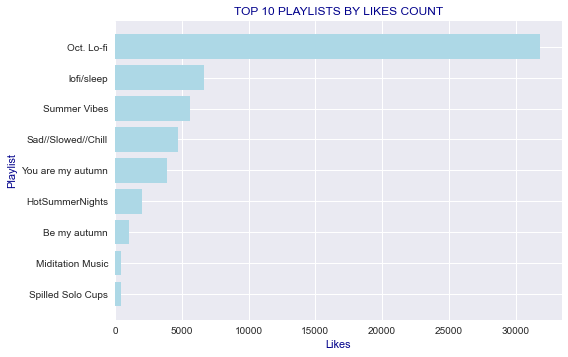

In [83]:
Top10Playlist(2020)

> - Năm 2020 gây ấn tượng khi một nửa vị trí trên BXH các track theo lượt nghe đều đến từ Việt Nam.
> - Tuy nhiên có một vấn đề xảy ra là không có một ca khúc nào của Việt Nam lọt vào top 10 BXH các track tính theo lượt thích. Điều đó có nghĩa là các ca khúc của chúng ta chỉ được nghe nhiều chứ không được thích nhiều.
> - Có thể thấy ở những BXH trước khi các ca khúc đều đến từ US-UK. Ta đã có một kết luận rằng số lượt nghe và lượt thích ở mỗi track là tỉ lệ thuận. Các track trong top 10 lượt nghe cũng nằm trong top 10 lượt thích.
> -  Vậy tại sao lại không có điều tương tự đối với các track của Việt Nam ? Có phải âm nhạc nước ta không đủ chất lượng, hay người dùng nước ta không có thói quen like một bài hát, playlist ? (**Nên biết rằng:** để yêu thích một track, playlist thì cần phải tạo tài khoản SoundCloud và việc tạo tài khoản tuy không tốn phí nhưng vẫn mang đến những yếu tố gây ảnh hưởng khác như lười, quên tài khoản,...)

#### Trong năm 2021

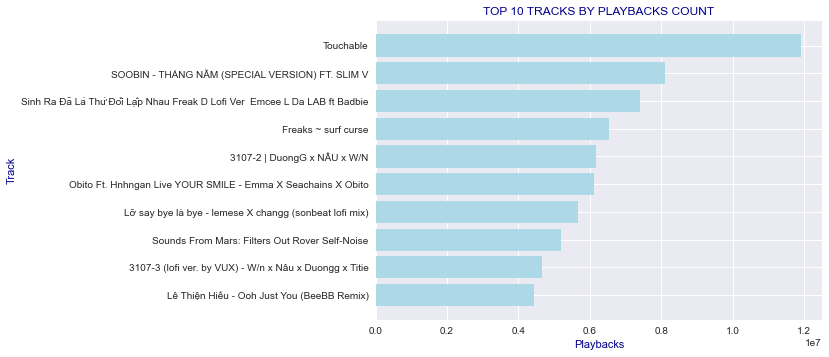

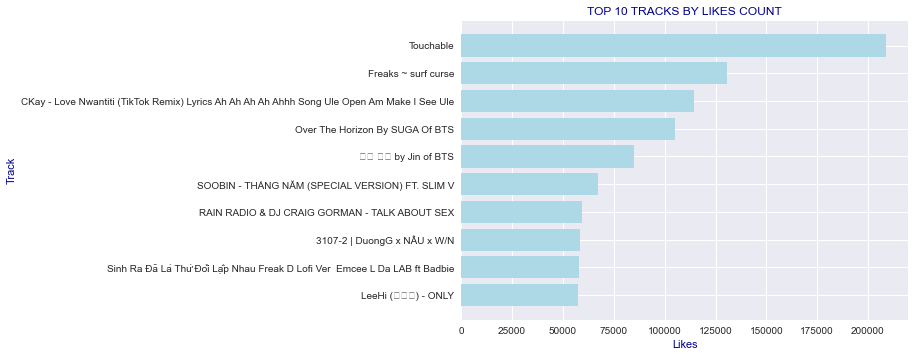

In [84]:
Top10Track(2021)

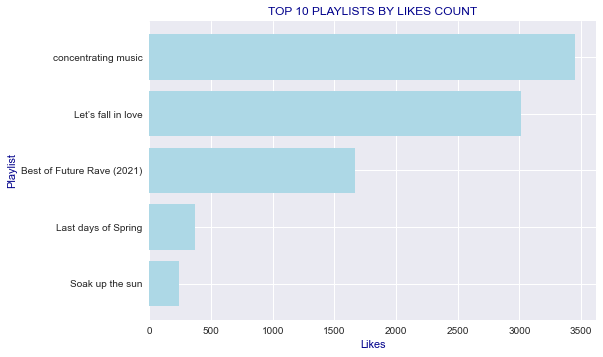

In [85]:
Top10Playlist(2021)

> - Các BXH lúc này đã được phủ đầy các track đến từ Việt Nam với hàng triệu lượt nghe và hàng trăm ngàn lượt thích.
> - Vấn đề được nói đến ở năm trước đã biến mất khi năm 2021 này các ca khúc tiếng Việt cũng nằm trong top lượt thích.
> - Người Việt đã thật sự biết cách sử dụng, cách bày tỏ sự yêu thích đối với bài hát hay nghe.
> - Có thể thấy rằng từ năm 2015, khi số lượng người dùng đã đạt mức khổng lồ, SoundCloud vẫn biết cách giữ lại người dùng và điều đó minh chứng rõ cho đến năm 2021. 
> - Bên cạnh đó là sự phát triển rộng rãi trên toàn thế giới, đặc biệt là châu Á.
> - Cũng không phải là không có sự giảm sút khi các BXH lúc này đã không còn nhiều những ca khúc đến từ US-UK. Người dùng đến từ những nơi đó là những người dùng đầu tiên của SoundCloud và liệu rằng bây giờ họ có còn sử dụng SoundCloud như một nền tảng âm nhạc ưu tiên hàng đầu hay không ? Các số liệu về BXH không đủ để đưa ra kết luận nhưng đây là một vấn đề mà chắc hẳn không thể không lưu tâm.

#### Tổng kết

> - Từ những năm đầu tiên thành lập cho đến nay, có thể thấy được sự phát triển không ngừng của SoundCloud trên thế giới.
> - Các con số biết nói qua từng năm, các thay đổi tích cực khi mà những vấn đề đưa ra ở năm trước thì đều sẽ được khắc phụ ở các năm sau đó.
> - SoundCloud lúc này đã quá quen thuộc đối với mọi người và là một trong những nền tảng nghe nhạc hàng đầu thế thế giới.

***
***
***
### 12. Phân tích follower count và track count của user. Đưa ra kết luận mối quan hệ giữa chúng là tỉ lệ thuận hay tỉ lệ nghịch ?

- Hiển thị thông tin của User

In [86]:
user

,id,username,city,country_code,created_at,followers_count,followings_count,first_name,last_name,full_name,kind,likes_count,comments_count,track_count,playlist_count,permalink,permalink_url,uri,verified
0,28508171,Vic Mensa.,chicago,US,2012-11-17,331604,9,Vic,Mensa,Vic Mensa,user,16,18,129,15,vicsavemoney,https://soundcloud.com/vicsavemoney,https://api.soundcloud.com/users/28508171,True
1,158105618,Eric Ryan ☀️,Toronto,CA,2015-06-14,718,42,Eric,Ryan,Eric Ryan,user,40,190,12,2,ericryanpascual,https://soundcloud.com/ericryanpascual,https://api.soundcloud.com/users/158105618,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8081,66682829,tous,Ha Noi,VN,2013-11-16,758,261,Cẩm,Tú,Cẩm Tú,user,1227,42,10,1,hydrangea99,https://soundcloud.com/hydrangea99,https://api.soundcloud.com/users/66682829,False
8082,1146848,Billx,UCSTR Records,FR,2010-06-08,80313,6,Rave Music,NaN,Rave Music,user,10,0,91,4,billx,https://soundcloud.com/billx,https://api.soundcloud.com/users/1146848,True


***
### Trả lời những câu hỏi về bộ dữ liệu và ngữ cảnh của vấn đề đưa ra.

> - Sử dụng dữ liệu từ file user.csv
> - Cần đưa ra mối quan hệ giữa hai cột followers_count và track_count để thấy hai cột này ảnh hưởng như thế nào với nhau.
> - Lấy dữ liệu của 100 users để phân tích.
> - Dữ liệu trong file đều đáp ứng đủ các yếu tố để phân tích.
> - Sử dụng **2 Line plot chart để vẽ 2 đường followers count và track count** vì đây là biểu đồ phù hợp cho việc đánh giá mối quan hệ giữa hai yếu tố trên là thuận hay nghịch

***
### Tiêu chí đánh giá



> - Followers là thứ mà mọi người dùng các ứng dụng về mạng xã hội, mạng nghe nhạc trực tuyến đều mong muốn có được càng nhiều càng tốt.
> - Với một nền tảng nghe nhạc trực tuyến như SoundCloud thì dĩ nhiên mọi vấn đề đều phải xoay quanh các sản phẩm âm nhạc.
> - Vì vậy sẽ phân tích xem liệu số track của một người dùng có ảnh hưởng như thế nào đến số followers của người dùng đó.
> - Số lượng hay chất lượng mới là thứ được ưu tiên hàng đầu.

*** 
### Tiền xử lý dữ liệu

- **Kiểm tra dữ liệu trùng lặp. Ở đây sẽ mặc định xét theo id vì mỗi user đều có một id riêng.**

In [87]:
if len(user['id']) != len(set(user['id'])):
    duplicated_idUser = True;
else:
    duplicated_idUser = False;

In [88]:
# TEST
assert duplicated_idUser == False

- **Cột followers_count và track_count đều đã có dạng int nên không cần thay đổi gì.** 

***
### Vẽ line chart cho followers count và tracks count

In [89]:
def draw_lineFollowersCount():
    fig, ax = plt.subplots(figsize=[18, 8])
    # lấy dữ liệu của 100 users. 
    # Vì dataFrame chưa được sắp xếp nên mặc định lấy 100 người đầu tiên cũng tương tự như việc random.
    data = user.head(100)
    ax.plot(data['username'], data['followers_count'], marker='o', linewidth=2, label='Followers count')
    plt.xticks(rotation=90)
    plt.title('LINE CHART OF FOLLOWERS COUNT')
    ax.set_xlabel('User Name')
    ax.set_ylabel('Count')
    plt.legend()
    plt.show()

def draw_lineTrackCount():
    fig, ax = plt.subplots(figsize=[18, 8])
    # lấy dữ liệu của 100 users. 
    # Vì dataFrame chưa được sắp xếp nên mặc định lấy 100 người đầu tiên cũng tương tự như việc random.
    data = user.head(100)
    ax.plot(data['username'], data['track_count'], marker='o', linewidth=2, label='Tracks Count')
    plt.xticks(rotation=90)
    plt.title('LINE CHART OF TRACK COUNT')
    ax.set_xlabel('User Name')
    ax.set_ylabel('Count')
    plt.legend()
    plt.show()

***
### Hiển thị biểu đồ

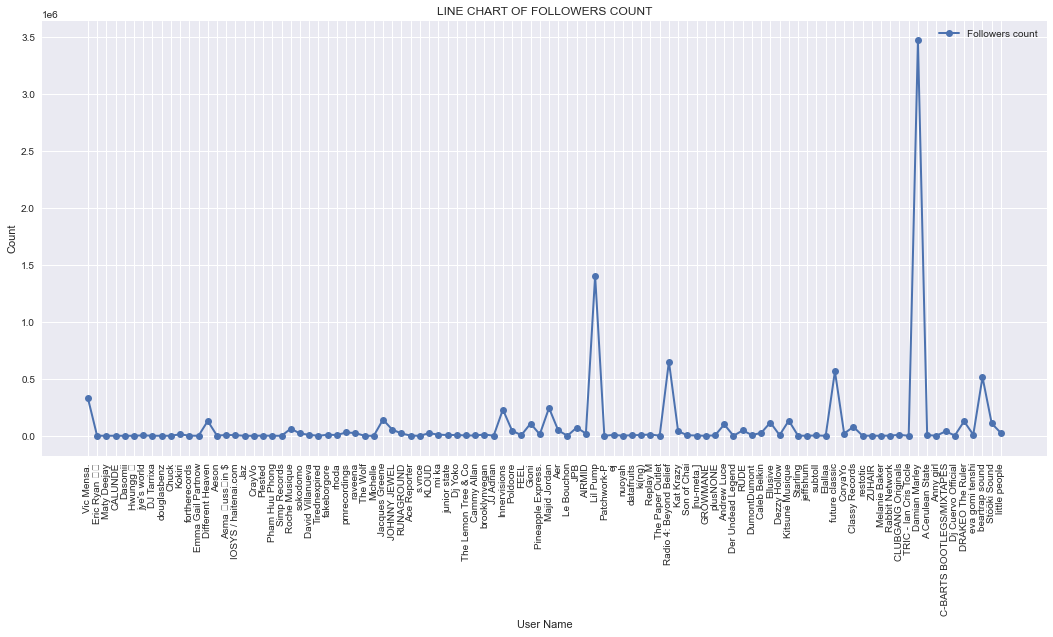

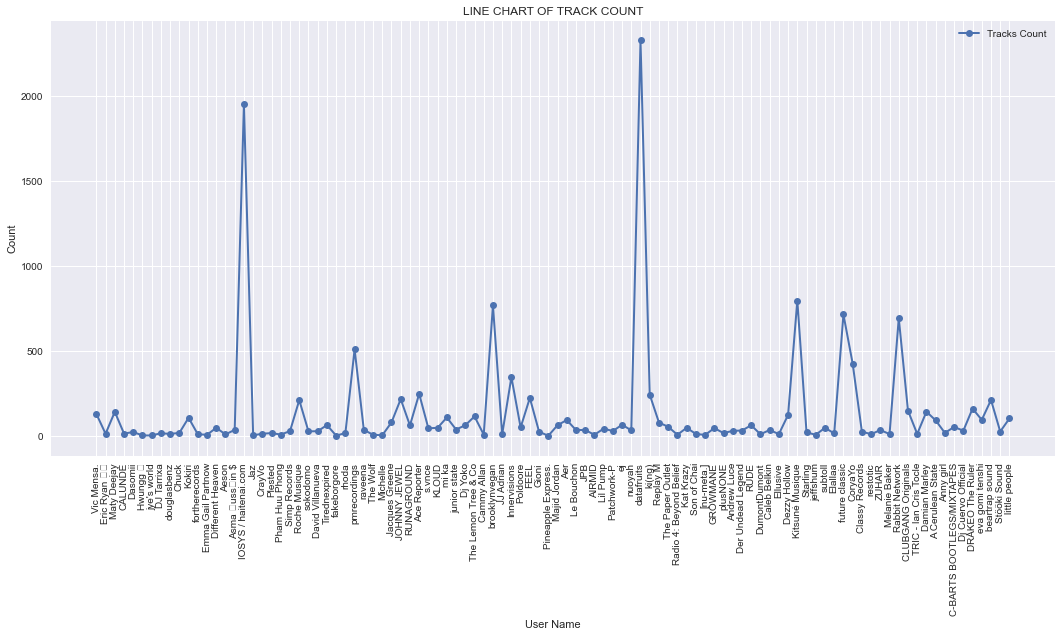

In [90]:
draw_lineFollowersCount()
draw_lineTrackCount()

> - Dựa vào đường thẳng biểu diễn followers count và tracks count ta có thể thấy rõ rằng 2 thông số này không hề tỉ lệ thuận với nhau.
> - Mối quan hệ giữa chúng cũng không phải là tỉ lệ nghịch.
> - Điều đó cho thấy rằng số followers và số tracks của user là không ảnh hưởng gì nhau. Không phải user nào có nhiều track thì sẽ có nhiều followers.
> - Có thể thấy rằng đối với SoundCloud, chất lượng vẫn cần hơn là số lượng. Vì vậy user cũng sẽ có ý thức về việc đăng bài hát hơn chứ không có quan niệm rằng đăng nhiều bài là sẽ được nhiều người theo dõi.